In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit

import h5py


# 1. Source Code

In [2]:
def acquire_data(filepath, experiment_type='swap_gain_sweep'):
    with h5py.File(filepath, "r") as f:
        
        # time_units = 2.32515 / 16 # tproc_V1
        time_units = 2.32515*2 / 16 # tproc_V2
        
        for i in f:
            # print(f'{i}: {f[i][()]}')
            print(i)


        print(f'experiment_type: {experiment_type}')
        if experiment_type == 'swap_gain_sweep':
            try:
                times = f['expt_cycles'][()]
            except:
                times = f['expt_samples'][()]
        
            
            population = f['population'][()] # corrected population data using confusion matrix

            try:
                corrected_population = f['population_corrected'][()]
                # corrected_population = f['corrected_population'][()]
            except KeyError as e:
                # If 'corrected_population' does not exist, initialize it as zeros
                print(f"KeyError: {e}. 'corrected_population' not found in the file. Initializing as zeros.") 
                corrected_population = np.zeros_like(population)
            ff_gain = f['Gain_Expt'][()]

            print(f['confusion_matrix'][()])



        elif experiment_type == 'current_swap_gain_sweep':
            try:
                times = f['expt_cycles2'][()]
            except:
                times = f['expt_samples2'][()]

            population = f['population'][()] # corrected population data using confusion matrix


            try:
                corrected_population = f['population_corrected'][()]
                # corrected_population = f['corrected_population'][()]
            except KeyError as e:
                # If 'corrected_population' does not exist, initialize it as zeros
                print(f"KeyError: {e}. 'corrected_population' not found in the file. Initializing as zeros.") 
                corrected_population = np.zeros_like(population)
                
            ff_gain = f['Gain_BS'][()]

        elif experiment_type == 'ramp_swap_gain_sweep_r':
            times = f['expt_samples'][()]

            population = f['population'][()] # corrected population data using confusion matrix


            try:
                corrected_population = f['population_corrected'][()]
                # corrected_population = f['corrected_population'][()]
            except KeyError as e:
                # If 'corrected_population' does not exist, initialize it as zeros
                print(f"KeyError: {e}. 'corrected_population' not found in the file. Initializing as zeros.") 
                corrected_population = np.zeros_like(population)
                
            ff_gain = f['Gain_BS'][()]

        
    times *= time_units
    
    return times, ff_gain, population, corrected_population

In [3]:
def acquire_singleshot_data(filepath, readout_qubit):
    
    readout_number = readout_qubit[1]
    
    with h5py.File(filepath, "r") as f:
        
        time_units = 2.32515 / 16
        
        i_g = f[f'i_g{readout_number}'][()]
        q_g = f[f'q_g{readout_number}'][()]
        
        i_e = f[f'i_e{readout_number}'][()]
        q_e = f[f'q_e{readout_number}'][()]
        
        angle = f['angle'][()][0]
        threshold = f['threshold'][()][0]

        
        return i_g, q_g, i_e, q_e, angle, threshold

In [4]:
def generate_current_swaps_filename(year, month, day, hour, minute, second):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\CurrentCalibration_GainSweep\CurrentCalibration_GainSweep_{}\CurrentCalibration_GainSweep_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [5]:
def generate_ramp_current_swaps_filename(year, month, day, hour, minute, second):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\RampCurrentCalibration_GainSweep\RampCurrentCalibration_GainSweep_{}\RampCurrentCalibration_GainSweep_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [6]:
def generate_singleshot_filename(year, month, day, hour, minute, second, local=False):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    if local:
        return r'C:\Users\mattm\OneDrive\Desktop\Research\Measurements\8QV1_Triangle_Lattice\SingleShot\SingleShot_{}\SingleShot_{}_{}_data.h5'.format(date_code, date_code, time_code)
    else:
        return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\SingleShot\SingleShot_{}\SingleShot_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [7]:
def generate_swaps_filename(year, month, day, hour, minute, second, adiabatic=False):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    if adiabatic:
        return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\AdiabaticRampOscillationsGainSweep\AdiabaticRampOscillationsGainSweep_{}\AdiabaticRampOscillationsGainSweep_{}_{}_data.h5'.format(date_code, date_code, time_code)
    else:
        return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\GainSweepOscillations\GainSweepOscillations_{}\GainSweepOscillations_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [8]:
def generate_ramp_beamsplitter_gain_filename(year, month, day, hour, minute, second):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\RampBeamsplitterGainR\RampBeamsplitterGainR_{}\RampBeamsplitterGainR_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [9]:
def generate_ramp_beamsplitter_BS_gain_filename(year, month, day, hour, minute, second):
    date_code = f'{year}_{month}_{day}'
    time_code = f'{hour}_{minute}_{second}'
    return r'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\RampDoubleJump_BS_GainR\RampDoubleJump_BS_GainR_{}\RampDoubleJump_BS_GainR_{}_{}_data.h5'.format(date_code, date_code, time_code)

In [10]:
def get_frequency_from_fft(exp, num_times, times_spacing, start_index=1, plot_spectra=False):
    exp_fft = rfft(exp)
    freqs_fft = rfftfreq(num_times, times_spacing) # GHz

    peak_index = np.argmax(np.abs(exp_fft[start_index:])) + start_index
    center_freq = freqs_fft[peak_index]
    
#     print(f'peak index: {peak_index}')
#     print(f'fft: {exp_fft}')
#     print(f'freqs: {freqs_fft}')

    if plot_spectra:
        plt.plot(freqs_fft, np.abs(exp_fft))
        plt.axvline(center_freq, linestyle='dashed', color='black')
        
        plt.xlabel('Frequency (GHz)')
        plt.ylabel('Amplitude')
        plt.show()
        
    return center_freq

In [11]:
def get_sin_fit_parameters(times, exp, guess=None, start_index=None, end_index=None):
    
    if start_index is None:
        start_index = 0
    
    if end_index is None:
        end_index = len(times)
    else:
        end_index = min(end_index, len(times))
        
    popt, pcov = curve_fit(sin_fit, times[start_index: end_index], exp[start_index: end_index], p0=guess, maxfev=100000)
    perr = np.sqrt(np.diag(pcov))
    
#     print(fit_p)
#     print(fit_p[0] / 2, fit_err[0] / 2)
    return popt, perr

In [12]:
def sin_fit(t, f, phi0, A, B, gamma):
    return A * np.sin(2 * np.pi * f * t + phi0)*np.exp(-gamma*t) + B

In [13]:
# def swap_rate_fit(x, Omega, x0, A, B, C):
#     return B*np.sqrt(np.power(Omega, 2) + np.power(A*(x - x0), 2)) + C

In [14]:
def swap_rate_fit(x, g, A, x0):
    return np.sqrt(np.power(g, 2) + np.power(A*(x - x0)/2, 2))

In [15]:
def swap_rate_fit_quadratic(x, g, A, x0, B, C, D):
    '''
    Usual swap rate fit function, but transform x by a quadratic
    '''

    x_prime = C * np.power(x - B, 2) + D

    return np.sqrt(np.power(g, 2) + np.power(A*(x_prime - x0)/2, 2))

In [16]:
class QubitSwapMeasurement:
    
    def __init__(self, qubit_1, qubit_2, filename, readout_index=0, singleshot_filename=None, acquire_kwargs={}, **kwargs):
        '''
        :param qubit_1: first qubit in swap
        :param qubit_2: second qubit in swap
        :param readout_index: index of the readout qubit
        :param filename: complete filename of swap data
        :param kwargs: used to add meta data for measurement object, such as what voltage/frequency the qubit/coupler was at
        
        '''
        
        self.qubit_1 = qubit_1
        self.qubit_2 = qubit_2
        
        self.filename = filename
        self.singleshot_filename = singleshot_filename 
        
        self.readout_index = readout_index
        
        self.times = None
        self.ff_gains = None
        self.populations = None
        self.corrected_populations = None
        
        self.coupling_strength = None
        self.coupling_strength_error = None
        self.coupling_efficiency = None
        
        self.ff_gains_analyzed = None
        self.swap_rates = None
        self.swap_rate_errors = None
        
        self.swap_rate_fit_popt = None
        self.swap_rate_fit_perr = None
        
        
        self.meta_data_dict = kwargs

        self.acquire_kwargs = acquire_kwargs
        
    def get_times(self):
        if self.times is None:
            self.acquire_data()
        return self.times
    
    def get_populations(self):
        if self.populations is None:
            self.acquire_data()
        
        return self.populations
    
    def get_corrected_populations(self):
        if self.corrected_populations is None:
            self.acquire_data()
        return self.corrected_populations
    
    def get_ff_gains(self):
        if self.ff_gains is None:
            self.acquire_data()
        return self.ff_gains
    
    def get_coupling_strength_error(self, **kwargs):
        if self.coupling_strength_error is None:
            self.extract_coupling_strength(**kwargs)
        return self.coupling_strength_error
    
    def get_coupling_strength(self, **kwargs):
        if self.coupling_strength is None:
            self.extract_coupling_strength(**kwargs)
        return self.coupling_strength
    
    def get_coupling_efficiency(self, **kwargs):
        '''
        :returns: coupling efficiency, which is the coupling strength divided by the qubit frequency
        '''

        if self.coupling_efficiency is None:
            if 'qubit_frequency' in kwargs:
                qubit_frequency = kwargs['qubit_frequency']
            elif 'qubit_frequency' in self.meta_data_dict:
                qubit_frequency = self.meta_data_dict['qubit_frequency']
            else:
                raise ValueError('No qubit frequency provided, cannot calculate coupling efficiency')
                

            coupling_strength = self.get_coupling_strength(**kwargs)
        self.coupling_efficiency = coupling_strength / qubit_frequency
        return self.coupling_efficiency
        
    
    def get_ff_gains_analyzed(self, **kwargs):
        if self.ff_gains_analyzed is None:
            self.get_sin_fits(**kwargs)
        return self.ff_gains_analyzed
    
    def get_swap_rates(self, **kwargs):
        if self.swap_rates is None:
            self.get_sin_fits(**kwargs)
        return self.swap_rates
    
    def get_swap_rate_errors(self, **kwargs):
        if self.swap_rate_errors is None:
            self.get_sin_fits(**kwargs)
        return self.swap_rate_errors
    
    def get_swap_rate_fit_popt(self, **kwargs):
        if self.swap_rate_fit_popt is None:
            self.get_swap_rate_fit(**kwargs)
        return self.swap_rate_fit_popt
    
    def get_swap_rate_fit_perr(self, **kwargs):
        if self.swap_rate_fit_perr is None:
            self.get_swap_rate_fit(**kwargs)
        return self.swap_rate_fit_perr
    
    def acquire_data(self):
        self.times, self.ff_gains, self.populations, self.corrected_populations = acquire_data(self.filename, **self.acquire_kwargs)
        
    def get_meta_param(self, param):
        if param in self.meta_data_dict:
            return self.meta_data_dict[param]
        else:
            print(f'{param} not in meta data')
            return None
        
    def get_sin_fits(self, exp_start_index=None, exp_end_index=None, ignored_indices=[], sin_start_index=None, sin_end_index=None, plot_sin_fits=False, plot_fft=False, plot_sin_errors=False, **kwargs):
        
        ### default parameters
        if exp_start_index is None and 'exp_start_index' in self.meta_data_dict:
            exp_start_index = self.meta_data_dict['exp_start_index']
            
        if exp_end_index is None and 'exp_end_index' in self.meta_data_dict:
            exp_end_index = self.meta_data_dict['exp_end_index']
            
        
        times = self.get_times()
        populations = self.get_populations()
        ff_gains = self.get_ff_gains()
        
        num_exps = populations.shape[1]
        
        if exp_start_index is None:
            exp_start_index = 0
    
        # exp_end_index is exclusive
        if exp_end_index is None:
            exp_end_index = num_exps
        else:
            exp_end_index = min(exp_end_index, num_exps)
            
        num_exps_analyzed = exp_end_index - exp_start_index
        
        
        swap_rates = []
        swap_rate_errors = []
        ff_gains_analyzed = []
        
        for i in range(exp_start_index, exp_end_index):
            if i in ignored_indices:
                continue

            exp = populations[self.readout_index, i, :]


            frequency_guess = get_frequency_from_fft(exp, len(times), times[1] - times[0], plot_spectra=plot_fft)

            sin_initial_guess = [frequency_guess, 0, 0.4, 0.5, 0]

            sin_popt, sin_perr = get_sin_fit_parameters(times, exp, guess=sin_initial_guess, start_index=sin_start_index, end_index=sin_end_index)

            swap_rate = sin_popt[0]/2*1000
            swap_rate_error = sin_perr[0]/2

            swap_rates.append(swap_rate)
            swap_rate_errors.append(swap_rate_error)
            ff_gains_analyzed.append(ff_gains[i])

            if plot_sin_fits:
                print(f'index: {i}')
                print(f'num exps: {num_exps}')
                print(f'frequency is {swap_rate} MHz')
                print(f'error is {swap_rate_error} MHz')


                plt.plot(times, exp, linestyle='', marker='o', label='data')
                plt.plot(times, sin_fit(times, *sin_popt), label='fit')
        #         plt.plot(times, sin_fit(times, *initial_guess), label='guess')

                plt.legend()
                plt.xlabel('Time (ns)')
                plt.ylabel('Population')

                plt.show()
                
        if plot_sin_errors:
            plt.plot(ff_gains_analyzed, swap_rate_errors, linestyle='', marker='o')

            plt.xlabel('FF Gain')
            plt.ylabel('Swap rate error (MHz)')

            plt.title('Swap rate vs detuning error')

            plt.show()
    
        ### fit swap rates to sqrt(Omega^2 - Delta^2)
        
        self.ff_gains_analyzed = ff_gains_analyzed
        self.ff_gains = ff_gains_analyzed
        self.swap_rates = swap_rates
        self.swap_rate_errors = swap_rate_errors
        
    def get_swap_rate_fit(self, plot_swap_rates_fit=False, **kwargs):
        
        ff_gain_fit = self.get_ff_gains_analyzed(**kwargs)
        swap_rates = self.get_swap_rates(**kwargs)
        swap_rate_errors = self.get_swap_rate_errors(**kwargs)

        g_guess = np.min(swap_rates)

        x0_guess_index = np.argmin(swap_rates)
        x0_guess = ff_gain_fit[x0_guess_index]

        quadratic = kwargs.get('quadratic', False)
        if quadratic:
            initial_guess = [g_guess, 0.1, x0_guess]
            bounds = ((0, 0, -np.inf), (np.inf, np.inf, np.inf))
        else:
            initial_guess = [g_guess, 0.1, x0_guess]
            bounds = ((0, 0, -np.inf), (np.inf, np.inf, np.inf))

        
        try:
            fit_successful = False
            ff_gain_points = np.linspace(ff_gain_fit[0], ff_gain_fit[-1], 1001)
            
            popt, pcov = curve_fit(swap_rate_fit, ff_gain_fit, swap_rates, p0=initial_guess, bounds=bounds, sigma=swap_rate_errors, maxfev=10000)

            self.swap_rate_fit_popt = popt
            
            perr = np.sqrt(np.diag(pcov))
            self.swap_rate_fit_perr = perr
            
            swap_rates_ff_gain_points = swap_rate_fit(ff_gain_points, *popt)



        except Exception as e:
            print(e)        
        else:
            fit_successful = True
        finally:

            if plot_swap_rates_fit:
                
                plt.errorbar(ff_gain_fit, swap_rates, yerr=swap_rate_errors, linestyle='', marker='o', label='data')
                if fit_successful:

                    coupling_strength = popt[0]
                    coupling_strength_error = perr[0]

                    
                    plt.plot(ff_gain_points, swap_rates_ff_gain_points, label='fit')  
                    plt.title(f'Swap rate vs detuning: {np.round(coupling_strength, 2)} MHz $\pm$ {np.round(coupling_strength_error, 3)} MHz')
                else:
                    plt.plot(ff_gain_points, swap_rate_fit(ff_gain_points, *initial_guess), label='guess')  
                    
                plt.xlabel('FF Gain')
                plt.ylabel('Swap rate (MHz)')

                plt.legend()

                plt.show()

    def extract_coupling_strength(self, **kwargs):
        
        popt = self.get_swap_rate_fit_popt(**kwargs)
        perr = self.get_swap_rate_fit_perr(**kwargs)
       
        
        coupling_strength = popt[0]
        coupling_strength_error = perr[0]


        self.coupling_strength = coupling_strength
        self.coupling_strength_error = coupling_strength_error
    
        
    def plot_chevron_vs_gain(self, corrected=False):
        times = self.get_times()
        if corrected:
            populations = self.get_populations()
        else:
            populations = self.get_corrected_populations()
        ff_gains = self.get_ff_gains()

        self._plot_color(times, ff_gains, populations, 'Time (ns)', 'FF Gain (a.u.)')
        
    def plot_chevron_vs_detuning(self, corrected=False):
        times = self.get_times()
        if corrected:
            populations = self.get_populations()
        else:
            populations = self.get_corrected_populations()
        ff_gains = self.get_ff_gains()
        
        swap_rate_fit_popt = self.get_swap_rate_fit_popt()
        
        g = swap_rate_fit_popt[0]
        A = swap_rate_fit_popt[1]
        x0 = swap_rate_fit_popt[2]
        
        detunings = A*(ff_gains - x0)
        
        self._plot_color(times, detunings, populations, 'Time (ns)', 'Detuning (MHz)')
        
    def _plot_color(self, x, y, z, x_label, y_label, colorbar_label=None, title=None):
        
        x_step = x[1] - x[0]
        y_step = y[1] - y[0]
        
        plt.imshow(z[self.readout_index,:,:], aspect='auto', origin='lower', interpolation='none', extent=(x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2))

        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        if colorbar_label is None:
            colorbar_label = 'Population'
            
        plt.colorbar(label=colorbar_label)
        
        if title is None:
            if self.coupling_strength is None:
                title = f'{self.qubit_1} - {self.qubit_2} swaps'
            else:
                title = f'{self.qubit_1} - {self.qubit_2} swaps with $g = {np.round(self.get_coupling_strength(), 2)}$ MHz'
        plt.title(title)
        
        plt.show()
        
    def plot_trace(self, index, corrected=False):
        times = self.get_times()
        if corrected:
            populations = self.get_populations()
        else:
            populations = self.get_corrected_populations()
        ff_gains = self.get_ff_gains()
        
        population_trace = populations[self.readout_index, index, :]
        
        plt.plot(times, population_trace, marker='o')
        plt.xlabel('Time (ns)')
        plt.ylabel('Population')
        
        plt.show()
        
    def plot_swap_rate_fit(self):
        
        ff_gains = self.get_ff_gains()
        swap_rates = self.get_swap_rates()
        swap_rate_errors = self.get_swap_rate_errors()
        
        swap_rates_popt = self.get_swap_rate_fit_popt()
        
        plt.errorbar(ff_gains, swap_rates, yerr=swap_rate_errors, linestyle='', marker='o', label='data')

        coupling_strength = swap_rates_popt[0]
        coupling_strength_error = swap_rate_errors[0]


        ff_gain_points = np.linspace(ff_gains[0], ff_gains[-1], 1001)
        swap_rates_ff_gain_points = swap_rate_fit(ff_gain_points, *swap_rates_popt)
        
        plt.plot(ff_gain_points, swap_rates_ff_gain_points, label='fit')  
        plt.title(f'Swap rate vs detuning: {np.round(coupling_strength, 2)} MHz $\pm$ {np.round(coupling_strength_error, 3)} MHz')
        
        plt.xlabel('FF Gain')
        plt.ylabel('Swap rate (MHz)')

        plt.legend()

        plt.show()
        
    def get_ff_gain_center(self):
        '''
        :returns: ff gain that leads to the slowest swap rate, when qubits are resonant
        '''
        
        # x0 in swap rates fit function
        g, A, x0 = self.get_swap_rate_fit_popt()
        return x0


Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
KeyError: "Unable to open object (object 'population_corrected' doesn't exist)". 'corrected_population' not found in the file. Initializing as zeros.
[[[0.9495 0.189 ]
  [0.0505 0.811 ]]]
index: 0
num exps: 21
frequency is 10.083758245974009 MHz
error is 3.5851006375017924e-05 MHz


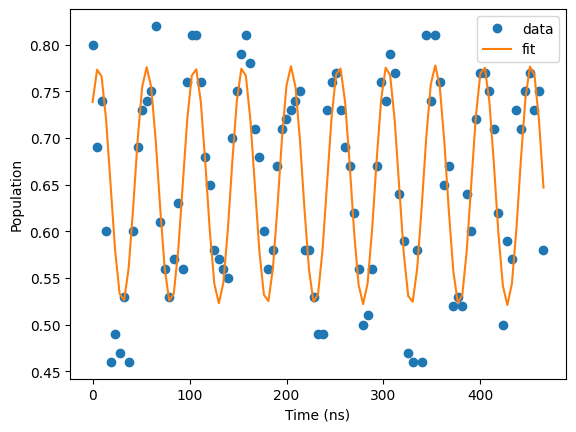

index: 1
num exps: 21
frequency is 9.590446871073105 MHz
error is 2.99524708859791e-05 MHz


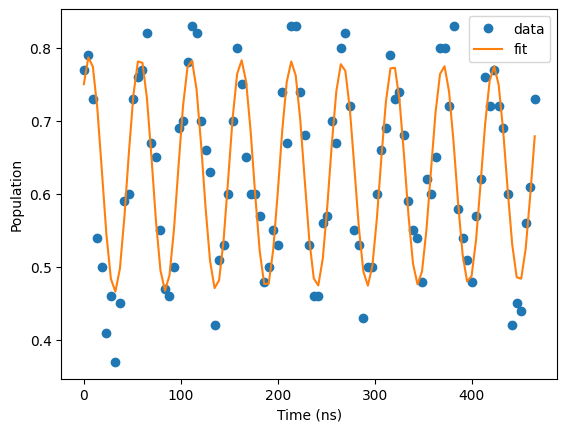

index: 2
num exps: 21
frequency is 9.127907515064537 MHz
error is 2.7012652187931375e-05 MHz


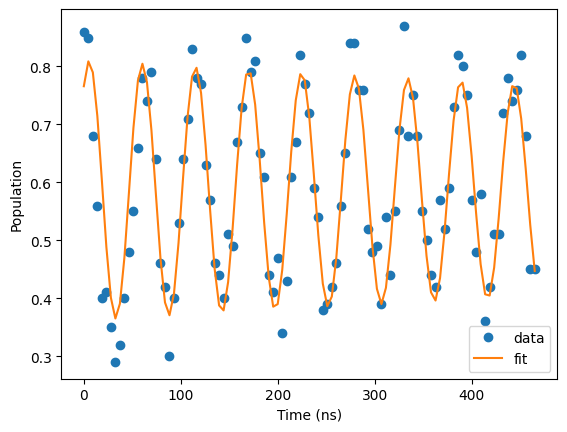

index: 3
num exps: 21
frequency is 8.71140012967347 MHz
error is 1.898332987988784e-05 MHz


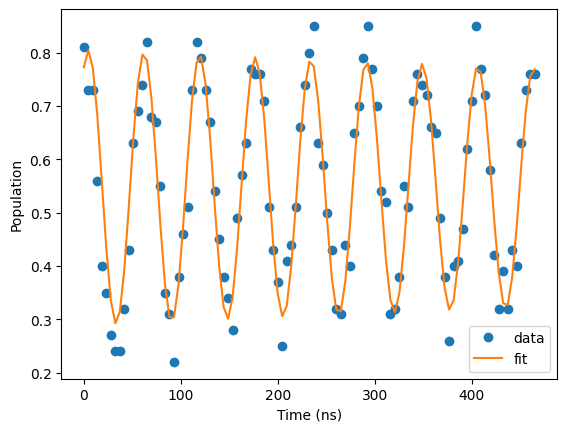

index: 4
num exps: 21
frequency is 8.36844492411339 MHz
error is 1.518790197177484e-05 MHz


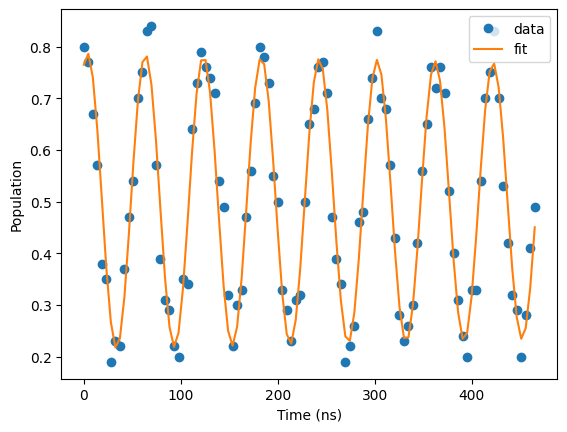

index: 5
num exps: 21
frequency is 8.08096029364037 MHz
error is 1.5180483300754794e-05 MHz


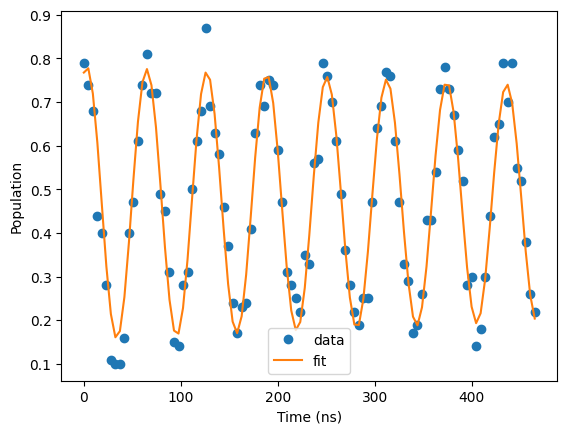

index: 6
num exps: 21
frequency is 7.849635016187009 MHz
error is 1.1651368687924646e-05 MHz


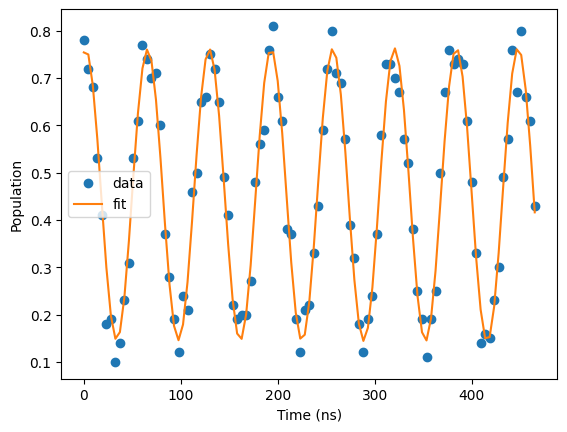

index: 7
num exps: 21
frequency is 7.674649147008884 MHz
error is 1.1210187380253638e-05 MHz


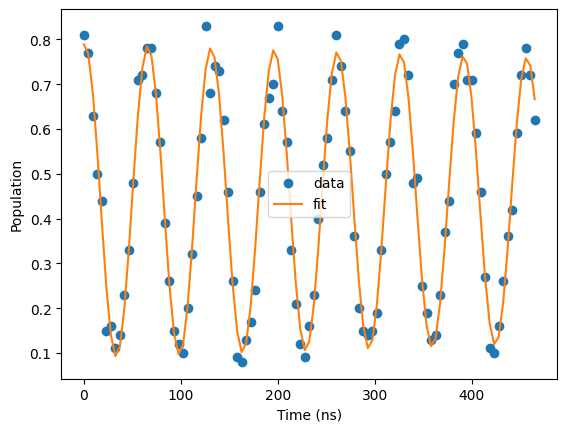

index: 8
num exps: 21
frequency is 7.546759970091748 MHz
error is 1.1678735809106816e-05 MHz


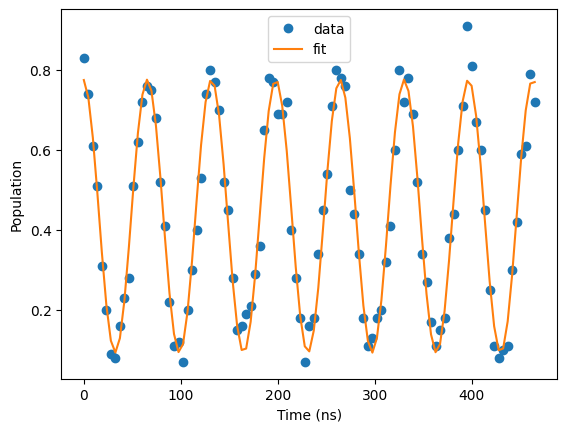

index: 9
num exps: 21
frequency is 7.531773949338586 MHz
error is 1.030835289090941e-05 MHz


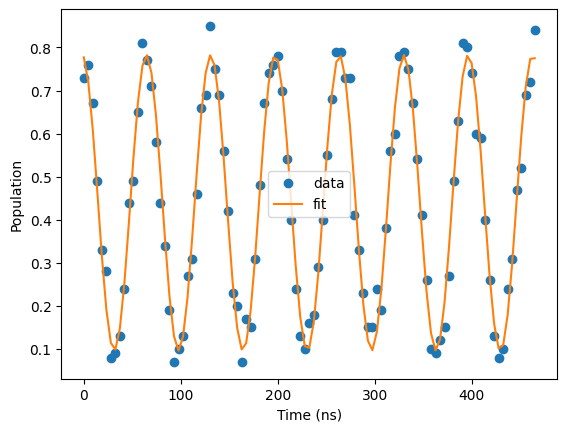

index: 10
num exps: 21
frequency is 7.591007497816386 MHz
error is 1.240358899798713e-05 MHz


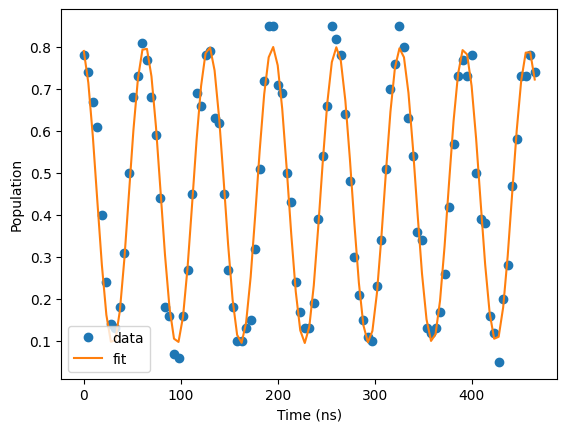

index: 11
num exps: 21
frequency is 7.704899608617834 MHz
error is 1.3289718059361785e-05 MHz


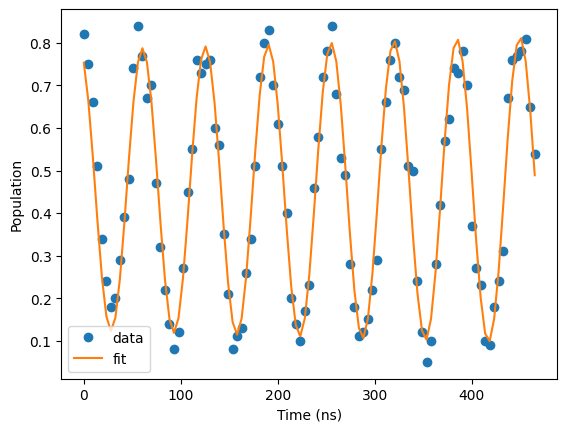

index: 12
num exps: 21
frequency is 7.885402419740903 MHz
error is 1.3786253092966728e-05 MHz


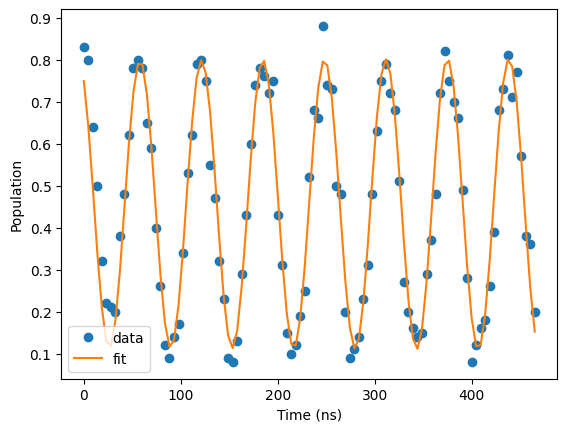

index: 13
num exps: 21
frequency is 8.138344322891074 MHz
error is 1.5276997341994426e-05 MHz


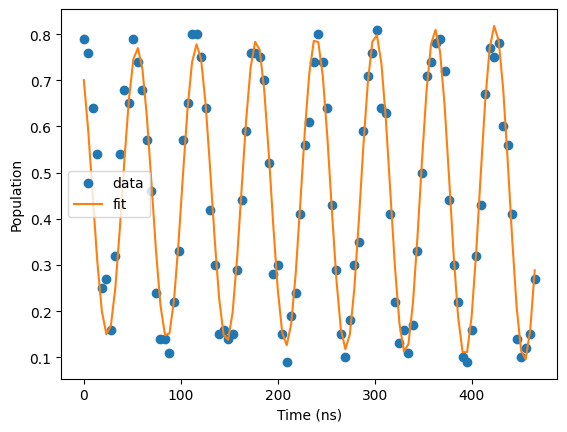

index: 14
num exps: 21
frequency is 8.446663976006944 MHz
error is 1.6621124131916174e-05 MHz


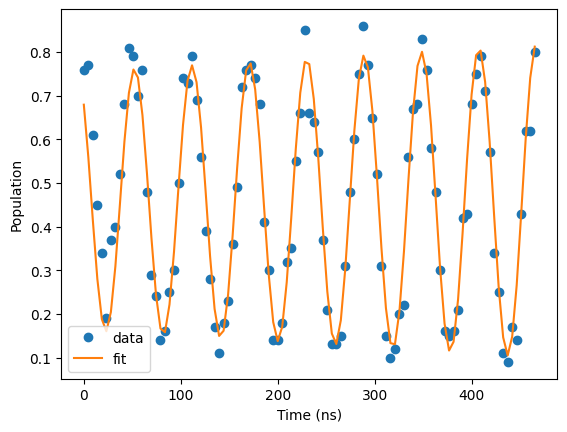

index: 15
num exps: 21
frequency is 8.830441046368483 MHz
error is 2.165718595743305e-05 MHz


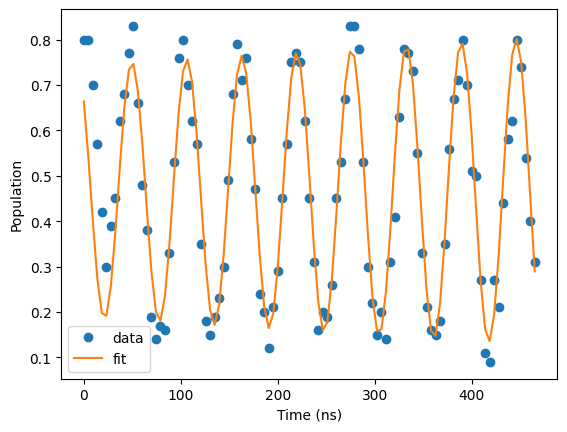

index: 16
num exps: 21
frequency is 9.28310975404075 MHz
error is 1.8670923105079957e-05 MHz


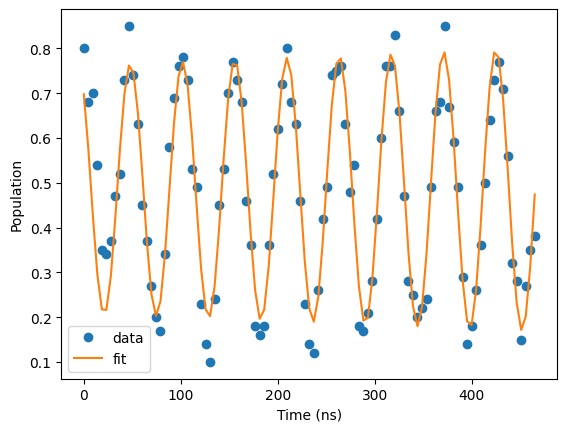

index: 17
num exps: 21
frequency is 9.720138854498131 MHz
error is 2.1032945485765063e-05 MHz


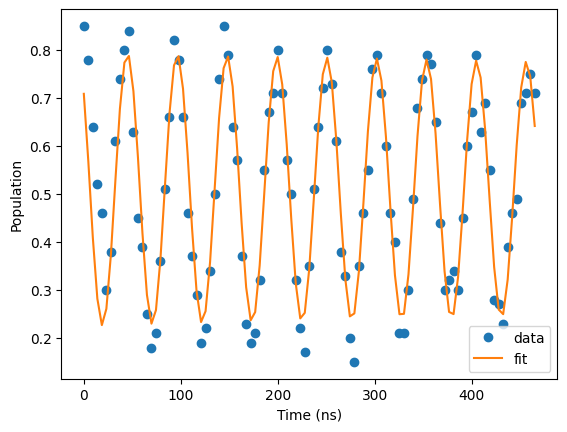

index: 18
num exps: 21
frequency is 10.215091146257976 MHz
error is 2.114319183065755e-05 MHz


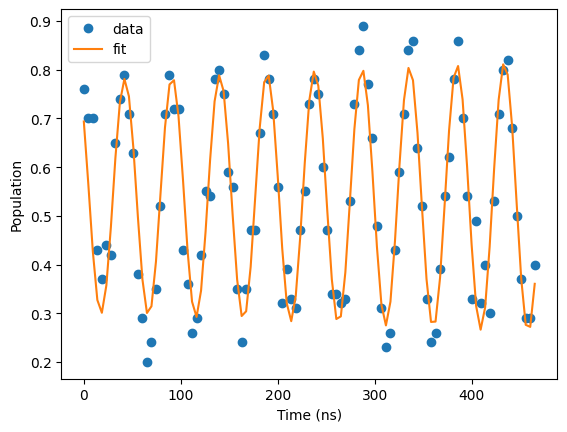

index: 19
num exps: 21
frequency is 10.781127622664645 MHz
error is 2.0962980610906322e-05 MHz


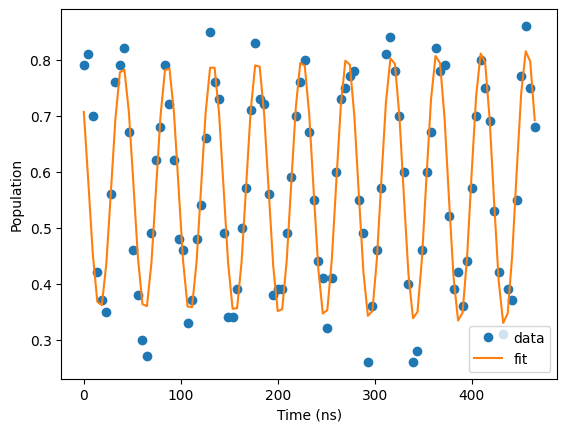

index: 20
num exps: 21
frequency is 11.376331427046265 MHz
error is 2.3035686099952238e-05 MHz


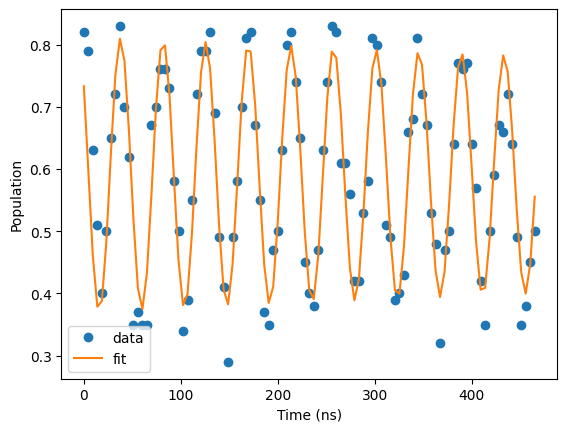

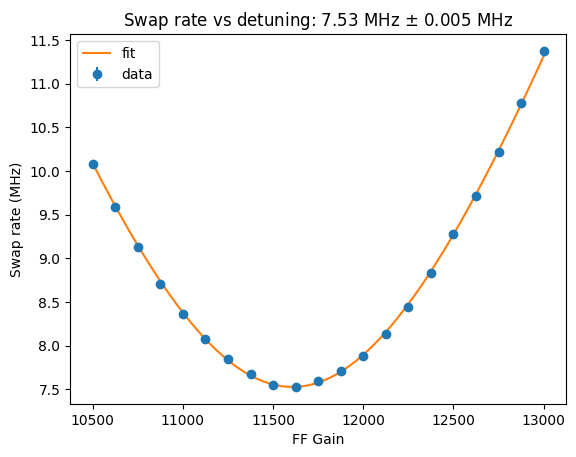

7.527618918209364


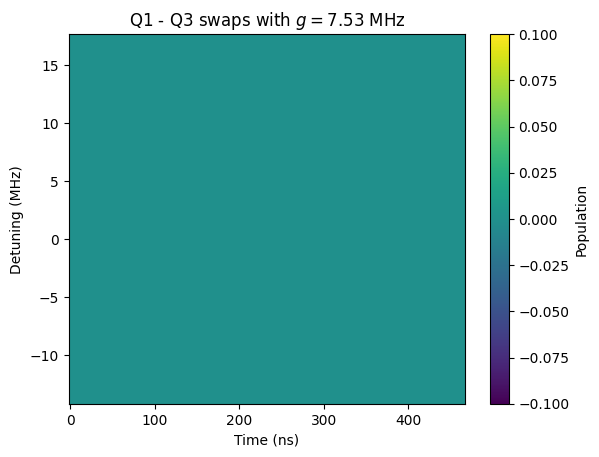

In [16]:
test_filename = generate_swaps_filename('2025', '07', '02', '10', '55', '50')
test_measurement = QubitSwapMeasurement('Q1', 'Q3', test_filename, exp_end_index=66)

test_measurement.acquire_data()



print(test_measurement.get_coupling_strength(plot_sin_fits=True, plot_fft=False, plot_sin_errors=False, plot_swap_rates_fit=True))

test_measurement.plot_chevron_vs_detuning()

# 2. Measure Coupling

### 2.1 Q1-Q3 Tunable Coupling

Swaps between Q1 and Q3 with coupler at 0 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9285 0.1285]
  [0.0715 0.8715]]]
coupling strength: 2.22 MHz
swap rate fit popt: [2.220000e+00 2.000000e-02 1.393248e+04]


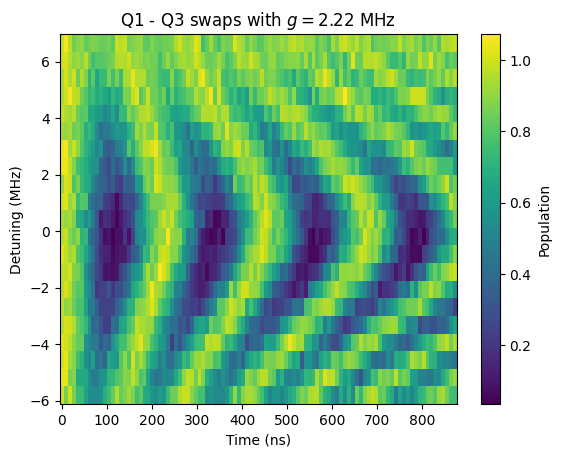

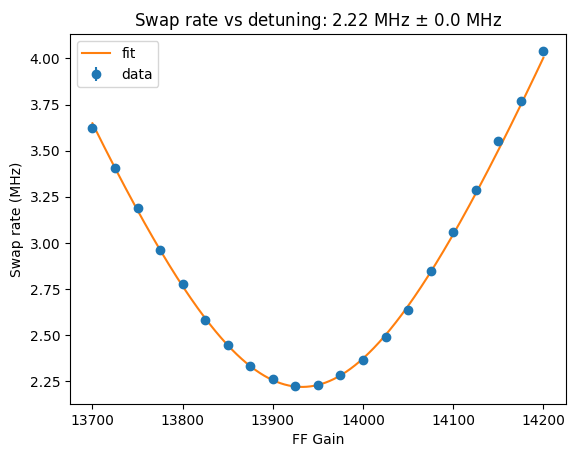


Swaps between Q1 and Q3 with coupler at 0.2 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.92   0.1405]
  [0.08   0.8595]]]
coupling strength: 2.63 MHz
swap rate fit popt: [2.630000e+00 2.000000e-02 1.356185e+04]


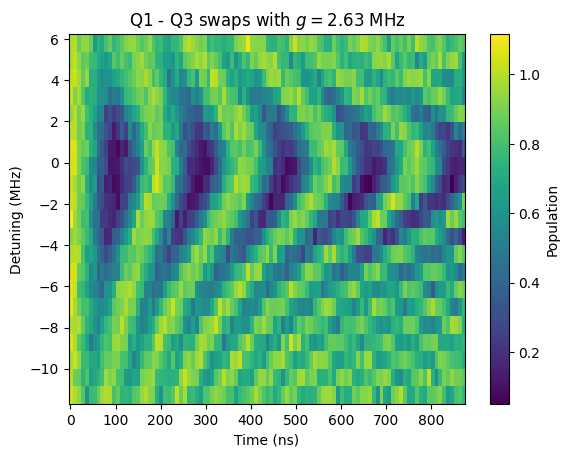

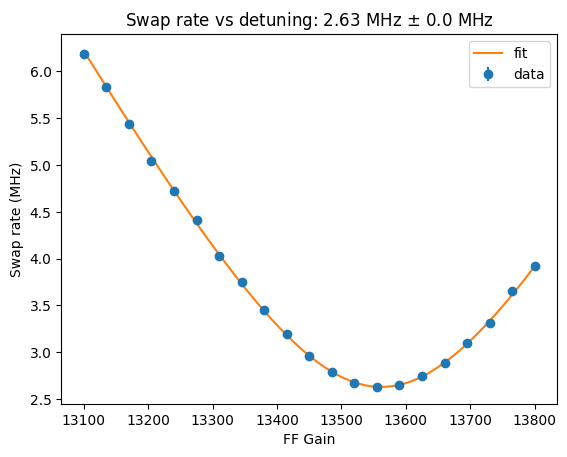


Swaps between Q1 and Q3 with coupler at 0.4 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9525 0.1555]
  [0.0475 0.8445]]]
coupling strength: 3.6 MHz
swap rate fit popt: [3.600000e+00 2.000000e-02 1.310101e+04]


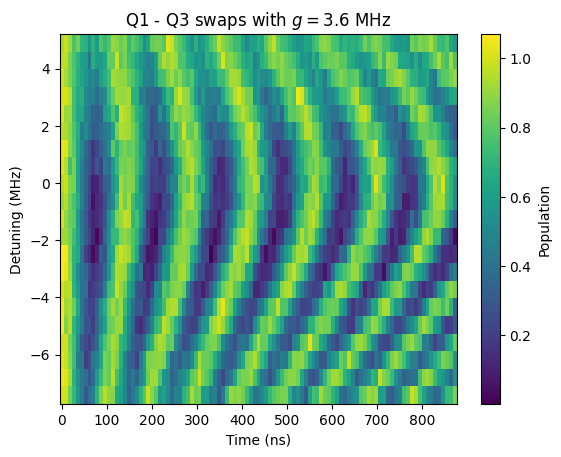

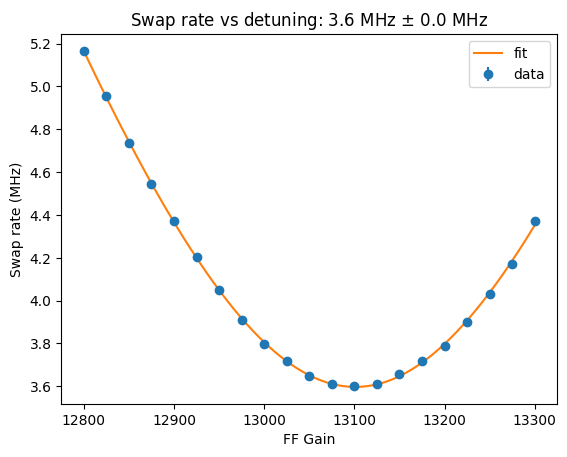


Swaps between Q1 and Q3 with coupler at 0.6 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9215 0.1635]
  [0.0785 0.8365]]]
coupling strength: 5.91 MHz
swap rate fit popt: [5.910000e+00 2.000000e-02 1.268227e+04]


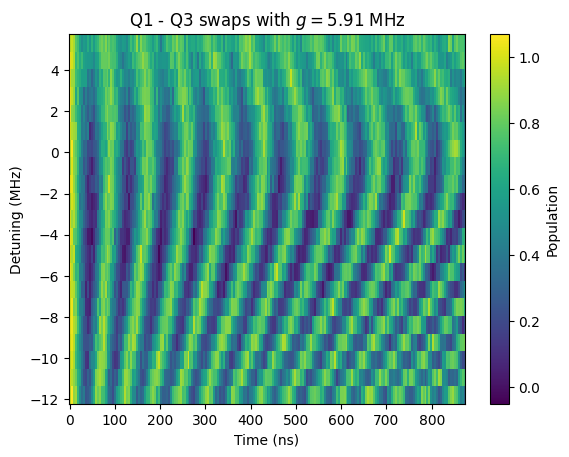

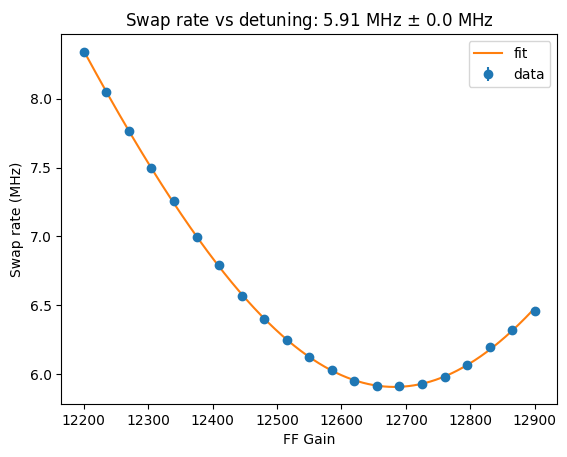


Swaps between Q1 and Q3 with coupler at 0.8 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9065 0.293 ]
  [0.0935 0.707 ]]]
coupling strength: 14.76 MHz
swap rate fit popt: [1.476000e+01 2.000000e-02 1.220486e+04]


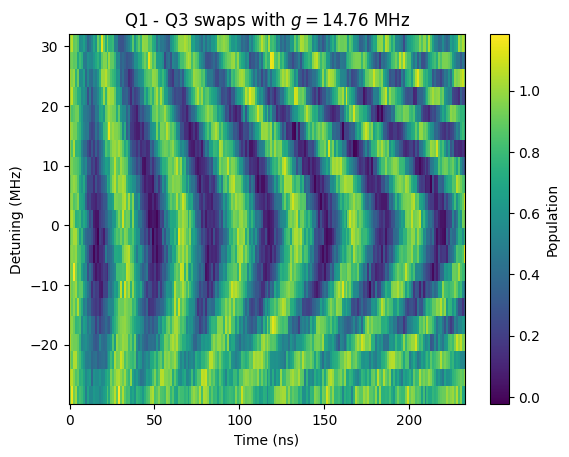

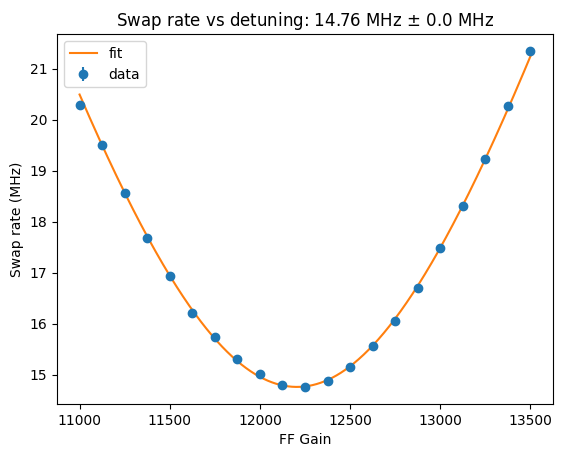


Swaps between Q1 and Q3 with coupler at 0.9 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9135 0.239 ]
  [0.0865 0.761 ]]]
coupling strength: 37.87 MHz
swap rate fit popt: [3.78700e+01 2.00000e-02 1.13622e+04]


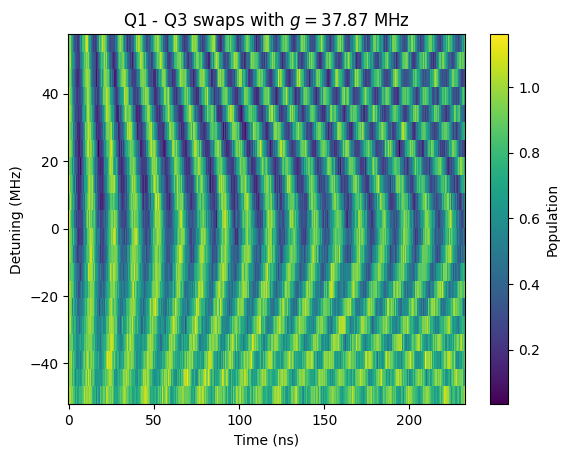

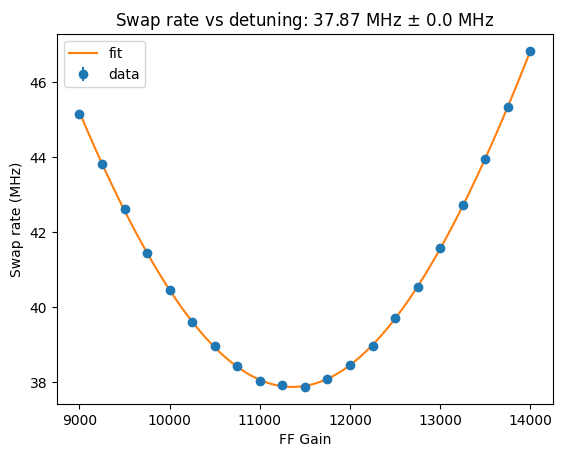


Swaps between Q1 and Q3 with coupler at 1.1 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9495 0.189 ]
  [0.0505 0.811 ]]]
coupling strength: 15.06 MHz
swap rate fit popt: [1.506000e+01 2.000000e-02 1.160711e+04]


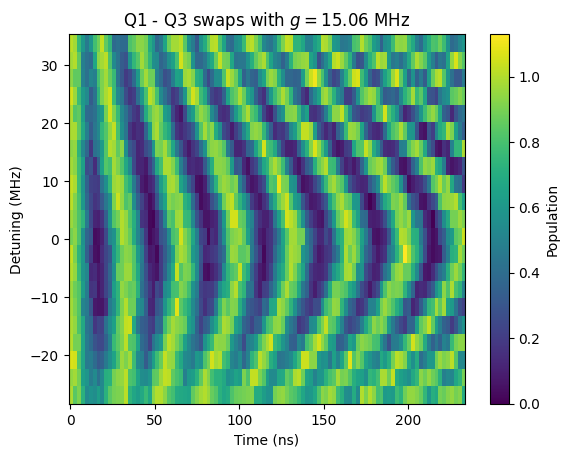

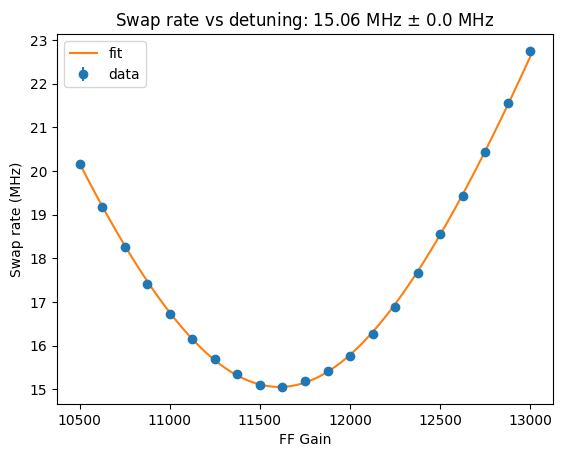


Swaps between Q1 and Q3 with coupler at 1.3 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9505 0.131 ]
  [0.0495 0.869 ]]]
coupling strength: 7.69 MHz
swap rate fit popt: [7.690000e+00 2.000000e-02 1.118458e+04]


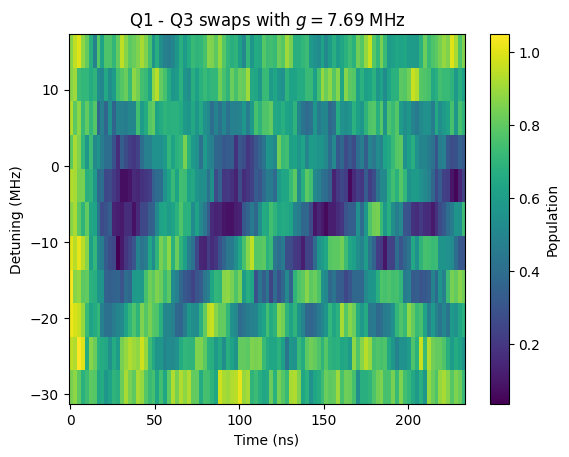

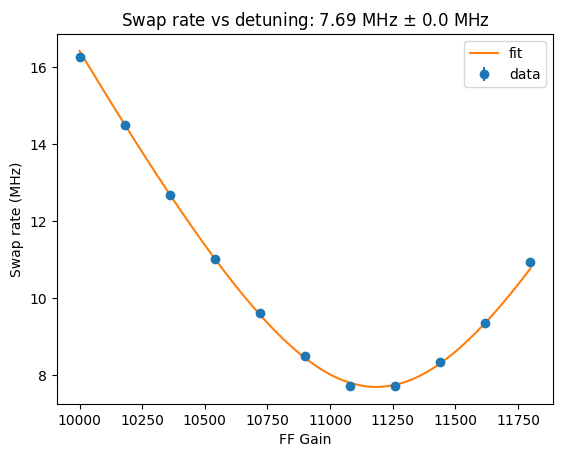


Swaps between Q1 and Q3 with coupler at 1.5 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9515 0.149 ]
  [0.0485 0.851 ]]]
coupling strength: 10.54 MHz
swap rate fit popt: [1.054000e+01 2.000000e-02 1.077608e+04]


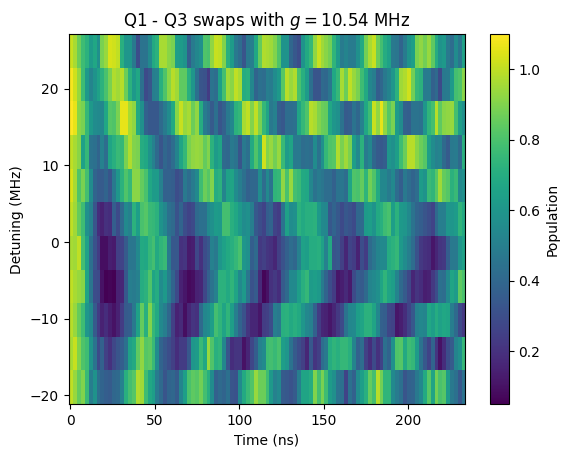

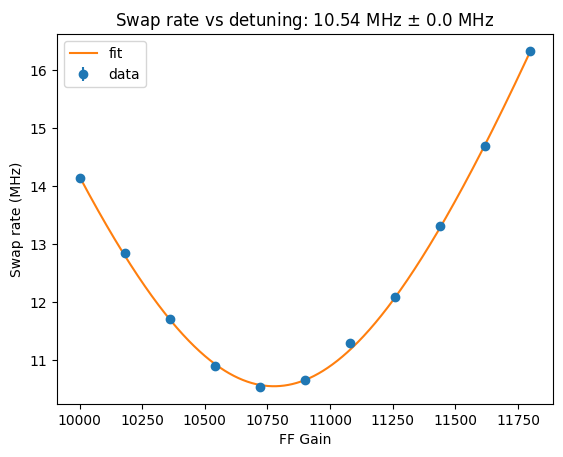


Swaps between Q1 and Q3 with coupler at 1.7 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9345 0.2905]
  [0.0655 0.7095]]]
coupling strength: 38.72 MHz
swap rate fit popt: [3.872000e+01 2.000000e-02 1.064556e+04]


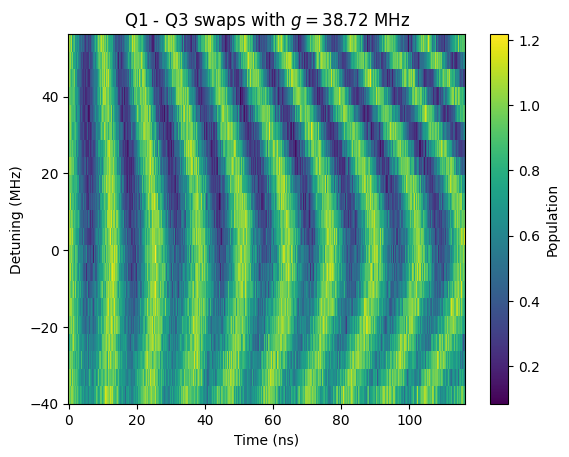

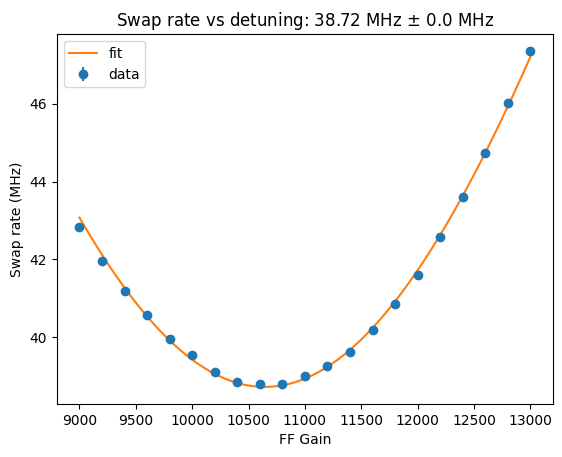


Swaps between Q1 and Q3 with coupler at -0.2 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.966 0.111]
  [0.034 0.889]]]
coupling strength: 2.14 MHz
swap rate fit popt: [2.140000e+00 2.000000e-02 1.428692e+04]


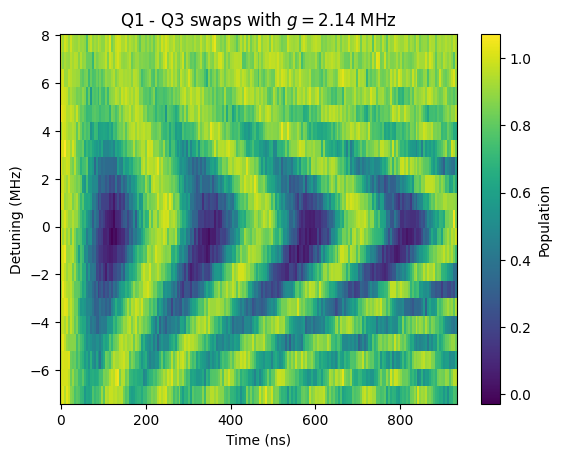

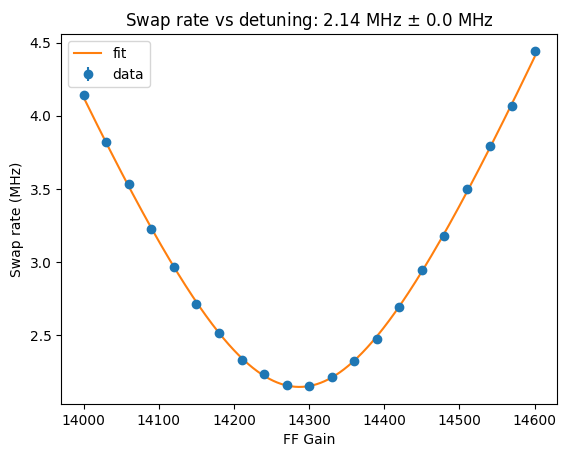


Swaps between Q1 and Q3 with coupler at -0.4 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9575 0.1225]
  [0.0425 0.8775]]]
coupling strength: 2.34 MHz
swap rate fit popt: [2.340000e+00 3.000000e-02 1.469481e+04]


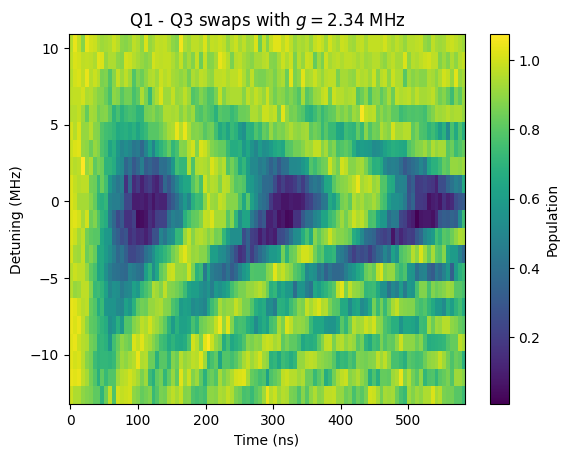

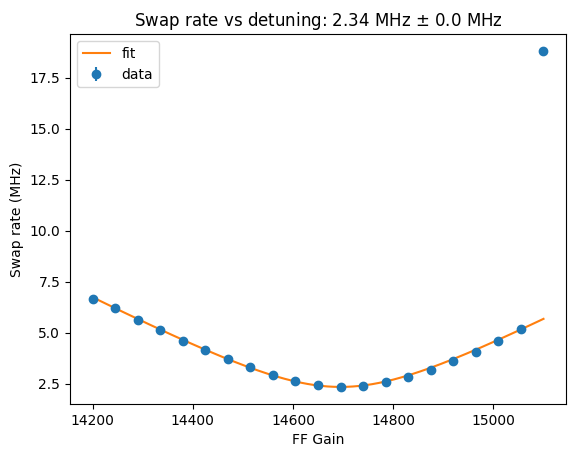


Swaps between Q1 and Q3 with coupler at -0.6 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9265 0.1795]
  [0.0735 0.8205]]]
coupling strength: 2.88 MHz
swap rate fit popt: [2.880000e+00 3.000000e-02 1.527278e+04]


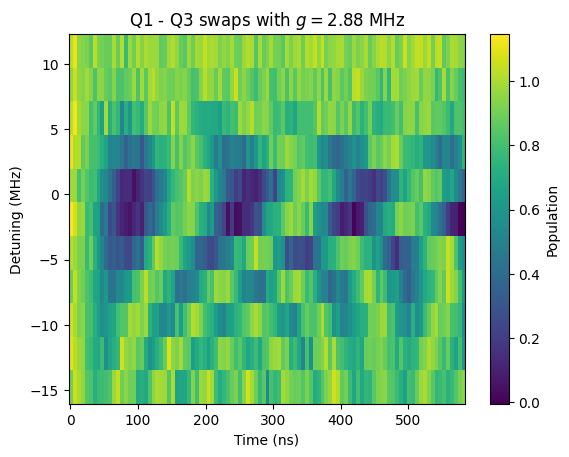

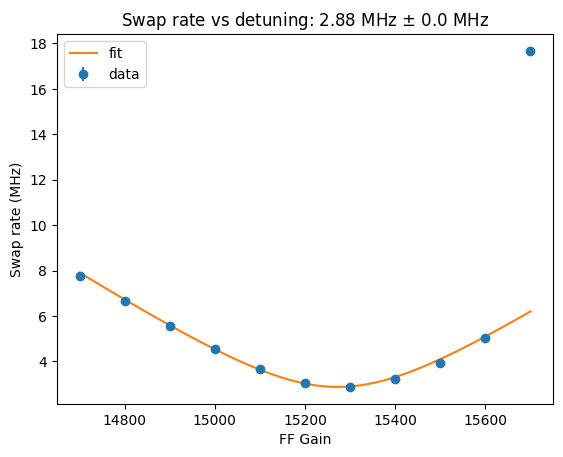


Swaps between Q1 and Q3 with coupler at -0.8 V
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9455 0.116 ]
  [0.0545 0.884 ]]]
coupling strength: 4.14 MHz
swap rate fit popt: [4.14000e+00 2.00000e-02 1.56939e+04]


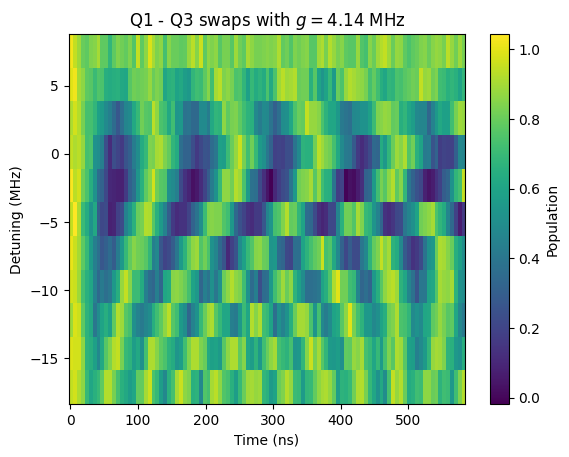

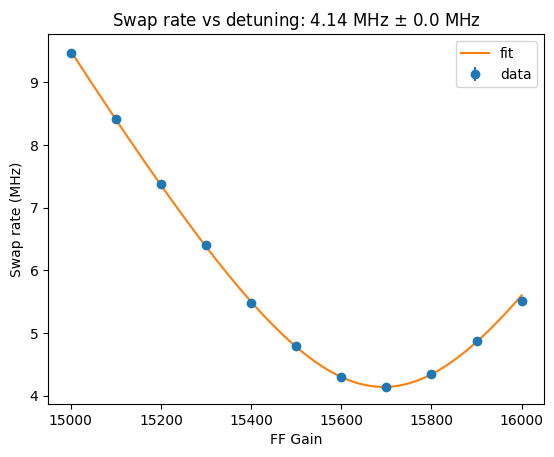

In [17]:
### Q1 Q3 swaps

Q1_Q3_swaps_3700 = []
qubit_1 = 'Q1'
qubit_2 = 'Q3'

Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '01', '14', '20', '44'), coupler_voltage=0))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '01', '12', '34', '12'), coupler_voltage=0.2))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '01', '14', '50', '55'), coupler_voltage=0.4))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '01', '15', '19', '38'), coupler_voltage=0.6))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '01', '16', '21', '22'), coupler_voltage=0.8))

Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '10', '28', '48'), coupler_voltage=0.9))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '10', '55', '50'), coupler_voltage=1.1))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '11', '08', '45'), coupler_voltage=1.3))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '11', '17', '17'), coupler_voltage=1.5))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '11', '30', '09'), coupler_voltage=1.7))


Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '11', '59', '40'), coupler_voltage=-0.2))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '13', '38', '12'), coupler_voltage=-0.4))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '14', '00', '02'), coupler_voltage=-0.6))
Q1_Q3_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '14', '15', '00'), coupler_voltage=-0.8))



Q1_Q3_swaps_4300 = []
Q1_Q3_swaps_4300.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '14', '53', '14'), coupler_voltage=1.5))
Q1_Q3_swaps_4300.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '15', '15', '56'), coupler_voltage=1.3))
Q1_Q3_swaps_4300.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '02', '16', '14', '49'), coupler_voltage=1.1))
Q1_Q3_swaps_4300.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '03', '12', '06', '37'), coupler_voltage=0.7))
Q1_Q3_swaps_4300.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '03', '12', '49', '23'), coupler_voltage=0.5))


for i in range(len(Q1_Q3_swaps_3700)):
    swap_measurement = Q1_Q3_swaps_3700[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    
    print(f'Swaps between {qubit_1} and {qubit_2} with coupler at {np.round(coupler_voltage, 2)} V')
    print(f'coupling strength: {np.round(swap_measurement.get_coupling_strength(plot_swap_rates_fit=False), 2)} MHz')  
    
    print(f'swap rate fit popt: {np.round(swap_measurement.swap_rate_fit_popt, 2)}')
    
    swap_measurement.get_coupling_strength()
    swap_measurement.plot_chevron_vs_detuning()
    swap_measurement.plot_swap_rate_fit()
    
    print()



# for i in range(len(Q1_Q3_swaps_4300)):
#     swap_measurement = Q1_Q3_swaps_4300[i]
    
#     coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
#     qubit_1 = swap_measurement.qubit_1
#     qubit_2 = swap_measurement.qubit_2
    
    
#     print(f'Swaps between {qubit_1} and {qubit_2} with coupler at {np.round(coupler_voltage, 2)} V')
#     print(f'coupling strength: {np.round(swap_measurement.get_coupling_strength(plot_swap_rates_fit=False), 2)} MHz')  
    
#     print(f'swap rate fit popt: {np.round(swap_measurement.swap_rate_fit_popt, 2)}')
    
#     swap_measurement.plot_chevron_vs_detuning()
    
#     print()

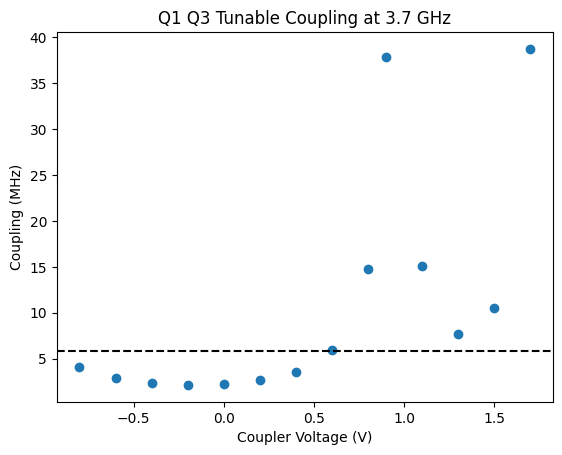

[-0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.1, 1.3, 1.5, 1.7]
[4.141171921421035, 2.8810509579570356, 2.340768105480668, 2.144944335516909, 2.2182903260159925, 2.6291438235214795, 3.5972632982864132, 5.907907554784103, 14.757104149025121, 37.86699420352392, 15.055237828310473, 7.6876145337544175, 10.544575452111296, 38.724688467341146]


In [21]:
### plot coupling vs coupler voltage

coupling_strengths = np.zeros(len(Q1_Q3_swaps_3700))
coupler_voltages = np.zeros(len(Q1_Q3_swaps_3700))

for i in range(len(Q1_Q3_swaps_3700)):
    
    swap_measurement = Q1_Q3_swaps_3700[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    coupling_strengths[i] = swap_measurement.get_coupling_strength()
    coupler_voltages[i] = coupler_voltage
    
plt.plot(coupler_voltages, coupling_strengths, linestyle='', marker='o', label='3.7 GHz')
plt.title('Q1 Q3 Tunable Coupling at 3.7 GHz')
plt.xlabel('Coupler Voltage (V)')
plt.ylabel('Coupling (MHz)')
plt.axhline(q1_q2_swap.get_coupling_strength(), linestyle='dashed', color='black', label='fixed coupling')
plt.show()

# Sort coupling_strengths and coupler_voltages by coupler_voltages
sorted_indices = np.argsort(coupler_voltages)
print(list(coupler_voltages[sorted_indices]))
print(list(coupling_strengths[sorted_indices]))


# coupling_strengths = np.zeros(len(Q1_Q3_swaps_4300))
# coupler_voltages = np.zeros(len(Q1_Q3_swaps_4300))
# for i in range(len(Q1_Q3_swaps_4300)):
    
#     swap_measurement = Q1_Q3_swaps_4300[i]
    
#     coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
#     qubit_1 = swap_measurement.qubit_1
#     qubit_2 = swap_measurement.qubit_2
    
#     coupling_strengths[i] = swap_measurement.get_coupling_strength()
#     coupler_voltages[i] = coupler_voltage
    
# plt.plot(coupler_voltages, coupling_strengths, linestyle='', marker='o', label='4.2 GHz')


# plt.xlabel('Coupler Voltage (V)')
# plt.ylabel('Coupling (MHz)')

# plt.title('Q1 Q3 Tunable Coupling')

# plt.legend()

# plt.show()

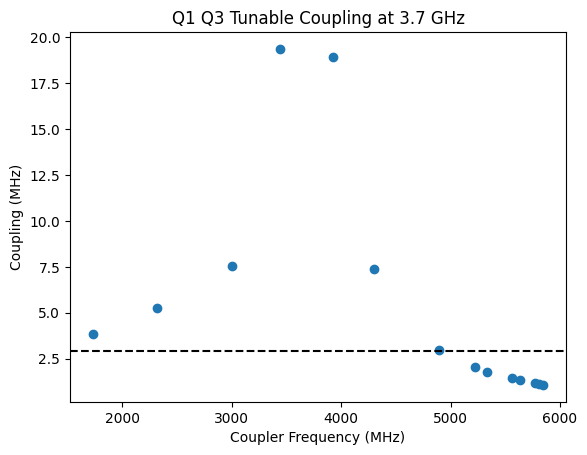

qubit frequency: ~3700 MHz
[5805.41, 5635.25, 5335.09, 4895.94, 4299.1, 3930.02, 3002.6, 1727.97, 2320.29, 3442.78, 5849.6, 5768.76, 5561.13, 5221.52]
[1.109145162984766, 1.3145719116828742, 1.7986316483325793, 2.9539537771496236, 7.378552072375927, 18.933497098628195, 7.527618918209364, 3.843807270890209, 5.272287723838821, 19.362344241993075, 1.0724721678716802, 1.1703840536533852, 1.4405255337163811, 2.070585959805079]


In [24]:
### plot coupling vs coupler frequency
# need a voltage to frequncy mapping

coupler_voltage_to_frequency_3700 = {}
coupler_voltage_to_frequency_3700[0] = 5805.41
coupler_voltage_to_frequency_3700[0.2] = 5635.25
coupler_voltage_to_frequency_3700[0.4] = 5335.09
coupler_voltage_to_frequency_3700[0.6] = 4895.94
coupler_voltage_to_frequency_3700[0.8] = 4299.1
coupler_voltage_to_frequency_3700[0.9] = 3930.02
coupler_voltage_to_frequency_3700[1.1] = 3002.6
coupler_voltage_to_frequency_3700[1.3] = 1727.97
coupler_voltage_to_frequency_3700[1.5] = 2320.29
coupler_voltage_to_frequency_3700[1.7] = 3442.78

coupler_voltage_to_frequency_3700[-0.2] = 5849.6
coupler_voltage_to_frequency_3700[-0.4] = 5768.76
coupler_voltage_to_frequency_3700[-0.6] = 5561.13
coupler_voltage_to_frequency_3700[-0.8] = 5221.52

coupler_voltage_to_frequency_4300 = {}
coupler_voltage_to_frequency_4300[1.5] = 2418.14
coupler_voltage_to_frequency_4300[1.3] = 1641.69
coupler_voltage_to_frequency_4300[1.1] = 2920.66
coupler_voltage_to_frequency_4300[0.7] = 4574.34
coupler_voltage_to_frequency_4300[0.5] = 5100.76



### plot coupling vs coupler voltage

coupling_strengths = np.zeros(len(Q1_Q3_swaps_3700))
coupler_frequencies = np.zeros(len(Q1_Q3_swaps_3700))

for i in range(len(Q1_Q3_swaps_3700)):
    
    swap_measurement = Q1_Q3_swaps_3700[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    coupling_strengths[i] = swap_measurement.get_coupling_strength()
    coupler_frequencies[i] = coupler_voltage_to_frequency_3700[coupler_voltage]
    
plt.plot(coupler_frequencies, coupling_strengths, linestyle='', marker='o', label='3.7 GHz')
plt.title('Q1 Q3 Tunable Coupling at 3.7 GHz')
plt.xlabel('Coupler Frequency (MHz)')
plt.ylabel('Coupling (MHz)')
plt.axhline(q1_q2_swap.get_coupling_strength(), linestyle='dashed', color='black', label='fixed coupling')
plt.show()

print('qubit frequency: ~3700 MHz')
print(list(coupler_frequencies))
print(list(coupling_strengths))


# 4300

# coupling_strengths = np.zeros(len(Q1_Q3_swaps_4300))
# coupler_frequencies = np.zeros(len(Q1_Q3_swaps_4300))
# for i in range(len(Q1_Q3_swaps_4300)):
    
#     swap_measurement = Q1_Q3_swaps_4300[i]
    
#     coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
#     qubit_1 = swap_measurement.qubit_1
#     qubit_2 = swap_measurement.qubit_2
    
#     coupling_strengths[i] = swap_measurement.get_coupling_strength()
#     coupler_frequencies[i] = coupler_voltage_to_frequency_4300[coupler_voltage]
    
# plt.plot(coupler_frequencies, coupling_strengths, linestyle='', marker='o', label='4.2 GHz')




# plt.xlabel('Coupler Frequency (MHz)')
# plt.ylabel('Coupling (MHz)')

# plt.title('Q1 Q3 Tunable Coupling')

# plt.legend(loc='upper left', fontsize=12)

# plt.show()


# print('qubit frequency: ~4300 MHz')
# print(list(coupler_frequencies))
# print(list(coupling_strengths))

Swaps between Q2 and Q4 with coupler at -0.21 V
experiment_type: swap_gain_sweep
coupling strength: 1.86 MHz
swap rate fit popt: [ 1.860000e+00  2.000000e-02 -2.557816e+04]


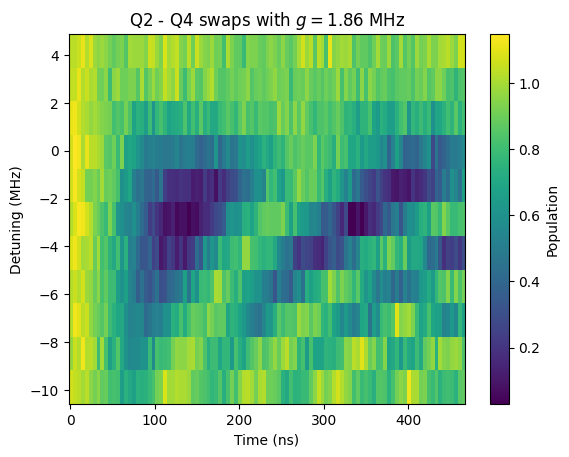


Swaps between Q2 and Q4 with coupler at 0.4 V
experiment_type: swap_gain_sweep
coupling strength: 3.35 MHz
swap rate fit popt: [ 3.350000e+00  2.000000e-02 -2.632364e+04]


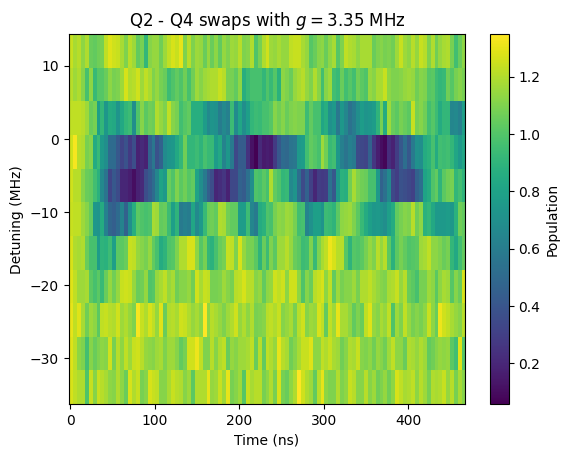


Swaps between Q2 and Q4 with coupler at 0.8 V
experiment_type: swap_gain_sweep
coupling strength: 14.51 MHz
swap rate fit popt: [ 1.451000e+01  2.000000e-02 -2.587648e+04]


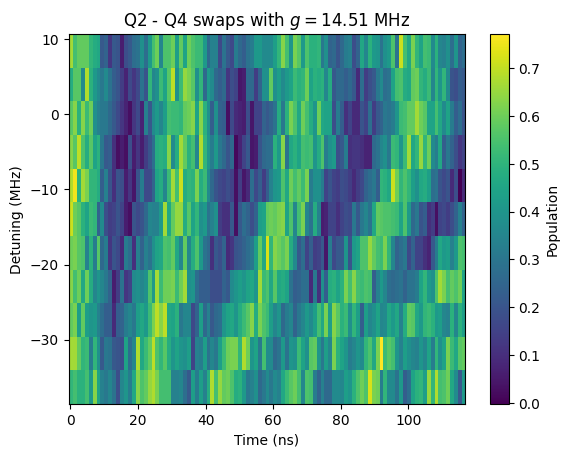

In [20]:
### Q2 Q4 swaps

Q2_Q4_swaps_3700 = []

qubit_1 = 'Q2'
qubit_2 = 'Q4'

Q2_Q4_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '09', '13', '32', '20'), coupler_voltage=-0.213))
Q2_Q4_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '09', '13', '47', '50'), coupler_voltage=0.4))
Q2_Q4_swaps_3700.append(QubitSwapMeasurement(qubit_1, qubit_2, generate_swaps_filename('2025', '07', '09', '14', '05', '16'), coupler_voltage=0.8))


for i in range(len(Q2_Q4_swaps_3700)):
    swap_measurement = Q2_Q4_swaps_3700[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    
    print(f'Swaps between {qubit_1} and {qubit_2} with coupler at {np.round(coupler_voltage, 2)} V')
    print(f'coupling strength: {np.round(swap_measurement.get_coupling_strength(plot_swap_rates_fit=False), 2)} MHz')  
    
    print(f'swap rate fit popt: {np.round(swap_measurement.swap_rate_fit_popt, 2)}')
    
    swap_measurement.plot_chevron_vs_detuning()
    
    print()

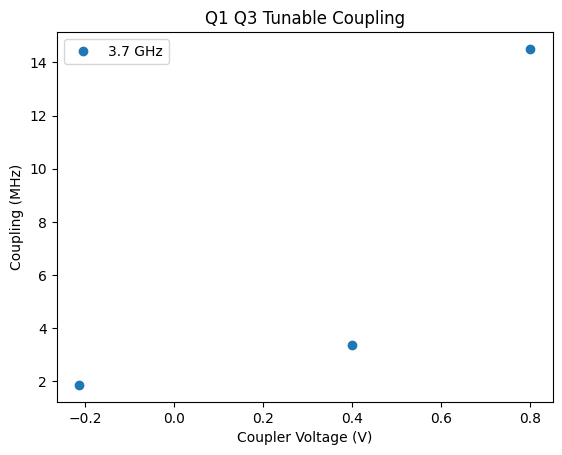

In [21]:
### plot coupling vs coupler voltage

coupling_strengths = np.zeros(len(Q2_Q4_swaps_3700))
coupler_voltages = np.zeros(len(Q2_Q4_swaps_3700))

for i in range(len(Q2_Q4_swaps_3700)):
    
    swap_measurement = Q2_Q4_swaps_3700[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    coupling_strengths[i] = swap_measurement.get_coupling_strength()
    coupler_voltages[i] = coupler_voltage
    
plt.plot(coupler_voltages, coupling_strengths, linestyle='', marker='o', label='3.7 GHz')

plt.xlabel('Coupler Voltage (V)')
plt.ylabel('Coupling (MHz)')

plt.title('Q1 Q3 Tunable Coupling')

plt.legend()

plt.show()

In [ ]:
### plot chevrons for presentation

plt.rcParams['font.size'] = 20

for i in range(len(Q1_Q3_swaps)):
    swap_measurement = Q1_Q3_swaps[i]
    
    x = swap_measurement.get_times()
    ff_gains = swap_measurement.get_ff_gains()
    z = swap_measurement.get_populations()
    
    
    z_max = np.max(z)
    z_min = np.min(z)
    z_range = z_max - z_min
    
    z = (z - z_min)/z_max
    
    
    swap_rate_fit_popt = swap_measurement.get_swap_rate_fit_popt()
        
    g = swap_rate_fit_popt[0]
    A = swap_rate_fit_popt[1]
    x0 = swap_rate_fit_popt[2]

    detunings = A*(ff_gains - x0)
    y = detunings
    
    x_step = x[1] - x[0]
    y_step = y[1] - y[0]
    
    plt.figure(figsize=(12, 6))

    plt.imshow(z[0,:,:], aspect='auto', origin='lower', interpolation='none', extent=(x[0] - x_step/2, x[-1] + x_step/2, y[0] - y_step/2, y[-1] + y_step/2),
              vmin=0, vmax=1)

    plt.xlabel('t (ns)')
    plt.ylabel(r'$\Delta\omega$ (MHz)')
    
    plt.xlim(0, 300)

    colorbar_label = 'Population'

    plt.colorbar(label=colorbar_label)

    title = f'$g = {np.round(swap_measurement.get_coupling_strength(), 2)}$ MHz'
    plt.title(title)

    plt.show()
    


NameError: name 'Q1_Q3_swaps' is not defined

### 2.1 Q1-Q2 and Q2-Q3 Fixed Coupling

Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.955  0.1955]
  [0.045  0.8045]]]


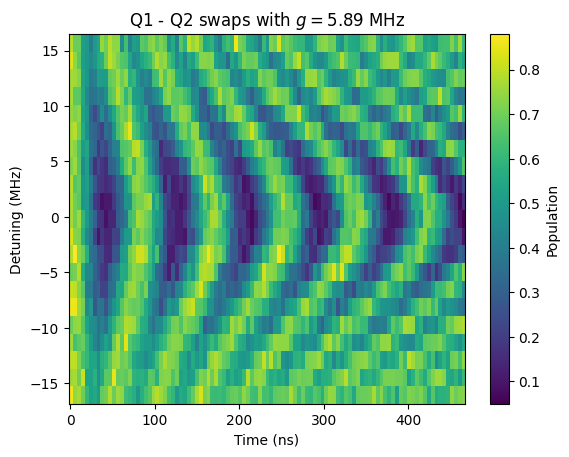

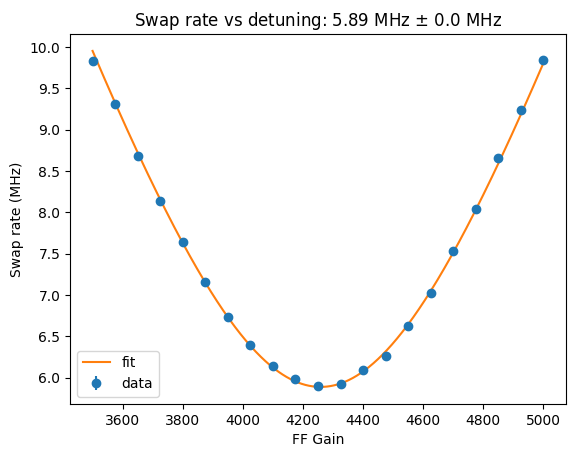

coupling efficiency: 0.00164
Q1-Q2 coupling: 5.89 MHz
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.969  0.2285]
  [0.031  0.7715]]]


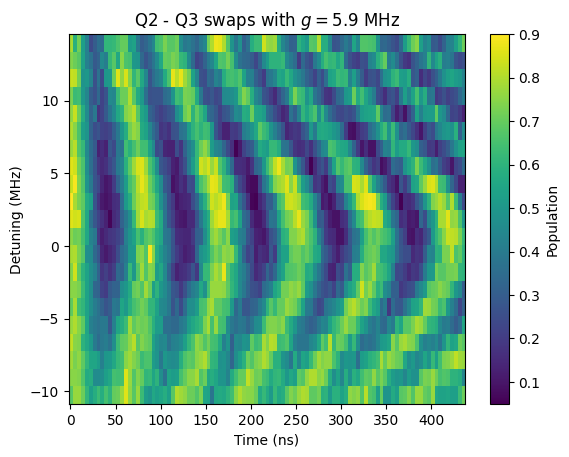

coupling efficiency: 0.00164
Q2-Q3 coupling: 5.9 MHz
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.82  0.111]
  [0.18  0.889]]]


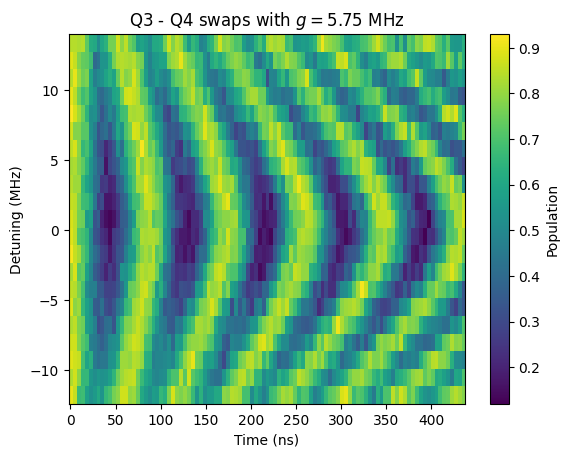

coupling efficiency: 0.00148
Q3-Q4 coupling: 5.75 MHz
Gain_Expt
angle
confusion_matrix
corrected_population
expt_cycles
population
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9315 0.202 ]
  [0.0685 0.798 ]]]


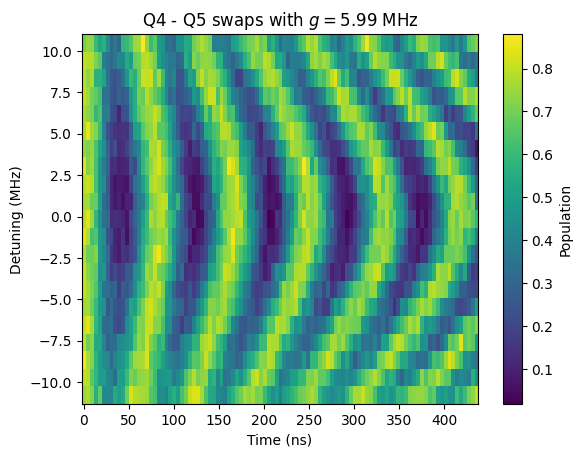

coupling efficiency: 0.00152
Q4-Q5 coupling: 5.99 MHz


In [20]:
### Fixed coupling

# Q1-Q2
q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '01', '12', '47', '21'), readout_qubit='Q2',
                                  qubit_frequency=3600)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_detuning(True)
q1_q2_swap.plot_swap_rate_fit()
q1_q2_coupling = q1_q2_swap.get_coupling_strength(plot_swap_rates_fit=True)
print(f'coupling efficiency: {np.round(q1_q2_swap.get_coupling_efficiency(), 5)}')
print(f'Q1-Q2 coupling: {np.round(q1_q2_coupling, 2)} MHz')


# Q2-Q3
q2_q3_swap = QubitSwapMeasurement('Q2', 'Q3', generate_swaps_filename('2025', '07', '01', '13', '09', '49'), readout_qubit='Q2',
                                  qubit_frequency=3599)
q2_q3_swap.get_coupling_strength()
q2_q3_swap.plot_chevron_vs_detuning(True)
q2_q3_coupling = q2_q3_swap.get_coupling_strength(plot_swap_rates_fit=True)
print(f'coupling efficiency: {np.round(q2_q3_swap.get_coupling_efficiency(), 5)}')
print(f'Q2-Q3 coupling: {np.round(q2_q3_coupling, 2)} MHz')

# Q3-Q4
q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_swaps_filename('2025', '07', '01', '13', '52', '49'), readout_qubit='Q4',
                                  qubit_frequency=3887.5)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_detuning(True)
q3_q4_coupling = q3_q4_swap.get_coupling_strength(plot_swap_rates_fit=True)
print(f'coupling efficiency: {np.round(q3_q4_swap.get_coupling_efficiency(), 5)}')
print(f'Q3-Q4 coupling: {np.round(q3_q4_coupling, 2)} MHz')

# Q4-Q5
q4_q5_swap = QubitSwapMeasurement('Q4', 'Q5', generate_swaps_filename('2025', '07', '01', '14', '03', '51'), readout_qubit='Q4',
                                  qubit_frequency=3947.3)
q4_q5_swap.get_coupling_strength()
q4_q5_swap.plot_chevron_vs_detuning(True)
q4_q5_coupling = q4_q5_swap.get_coupling_strength(plot_swap_rates_fit=True)
print(f'coupling efficiency: {np.round(q4_q5_swap.get_coupling_efficiency(), 5)}')
print(f'Q4-Q5 coupling: {np.round(q4_q5_coupling, 2)} MHz')


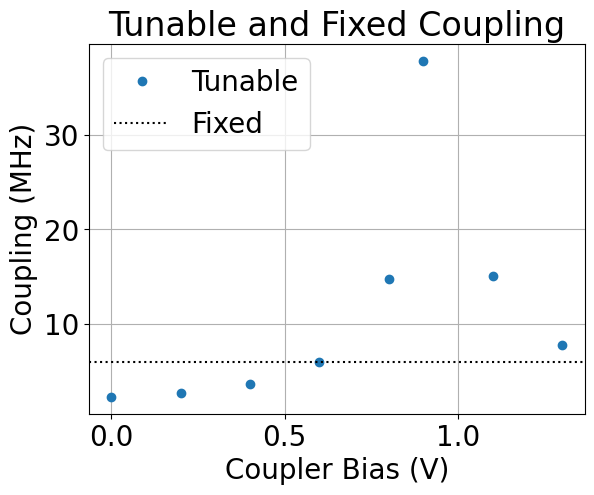

In [ ]:
### plot coupling vs coupler voltage

coupling_strengths = np.zeros(len(Q1_Q3_swaps))
coupler_voltages = np.zeros(len(Q1_Q3_swaps))

for i in range(len(Q1_Q3_swaps)):
    
    swap_measurement = Q1_Q3_swaps[i]
    
    coupler_voltage = swap_measurement.get_meta_param('coupler_voltage')
    qubit_1 = swap_measurement.qubit_1
    qubit_2 = swap_measurement.qubit_2
    
    coupling_strengths[i] = swap_measurement.get_coupling_strength()
    coupler_voltages[i] = coupler_voltage
    
plt.plot(coupler_voltages, coupling_strengths, linestyle='', marker='o', label='Tunable')

plt.xlabel('Coupler Bias (V)')
plt.ylabel('Coupling (MHz)')

plt.title('Tunable and Fixed Coupling')

plt.axhline(q1_q2_coupling, color='black', linestyle=':', label='Fixed')
# plt.axhline(2*q1_q2_coupling, color='gray', linestyle=':', label='Q1-Q2 x2')

# plt.axhline(q1_q2_coupling, color='red', linestyle=':', label='Q2-Q3')
# plt.axhline(2*q1_q2_coupling, color='pink', linestyle=':', label='Q2-Q3 x2')

plt.grid()
plt.legend()

plt.show()

### 3. Measure FF Gain
This section is used to figure out the optimal FF gain to put two qubits onto resonance

KeyError: "Unable to open object (object 'corrected_population' doesn't exist)". 'corrected_population' not found in the file. Initializing as zeros.


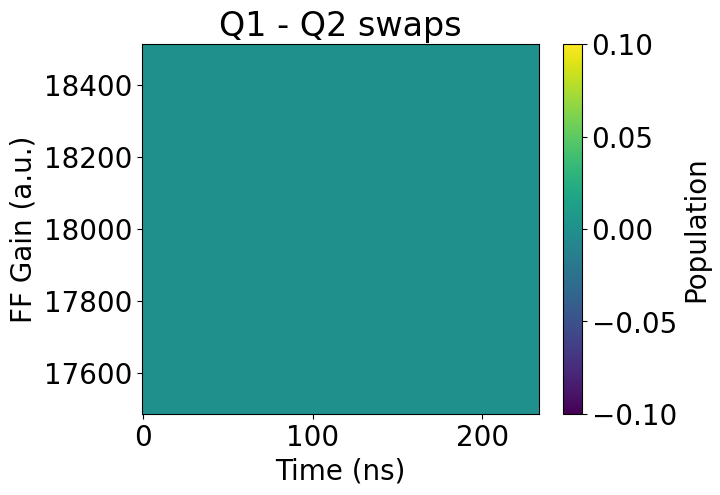

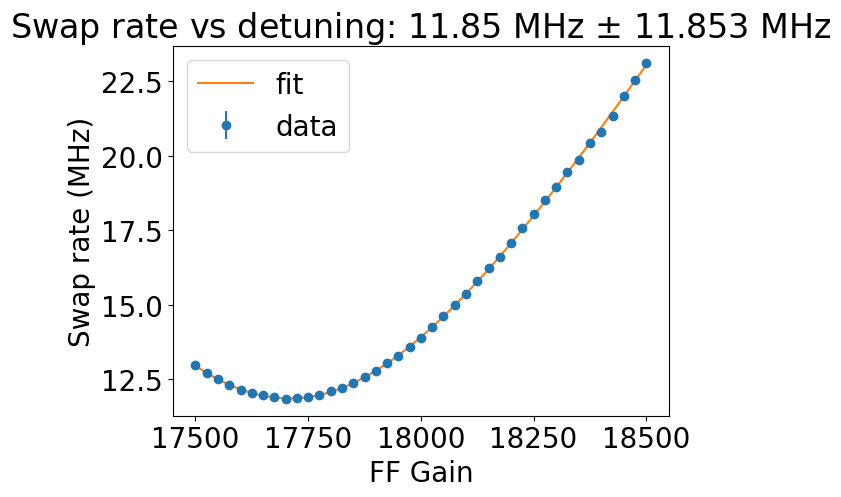

17708.516691132278
KeyError: "Unable to open object (object 'corrected_population' doesn't exist)". 'corrected_population' not found in the file. Initializing as zeros.


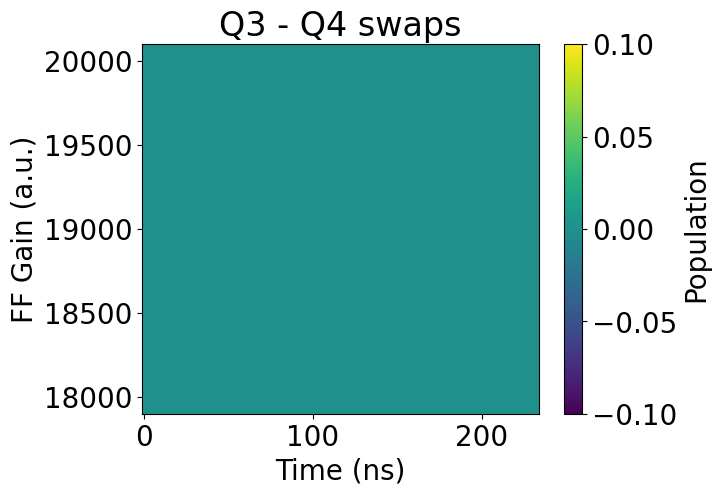

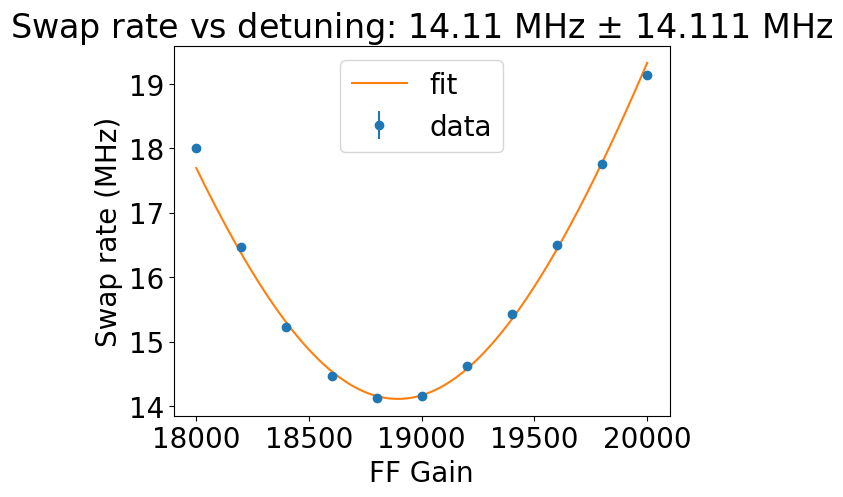

18894.098537941765


In [ ]:
q1_q2_test_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '08', '12', '12', '46'))
q1_q2_test_swap.plot_chevron_vs_gain()
q1_q2_test_swap.plot_swap_rate_fit()
print(q1_q2_test_swap.get_ff_gain_center())


q3_q4_test_swap = QubitSwapMeasurement('Q3', 'Q4', generate_swaps_filename('2025', '07', '08', '12', '58', '45'))
q3_q4_test_swap.plot_chevron_vs_gain()
q3_q4_test_swap.plot_swap_rate_fit()
print(q3_q4_test_swap.get_ff_gain_center())


### 3.1 Current Calibration Measurements



Gain_BS: [4000. 4150. 4300. 4450. 4600. 4750. 4900. 5050. 5200. 5350. 5500.]
I: [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
Q: [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
Qubit_Readout_List: [1.]
angle: [-1.82756879]
confusion_matrix: [[[0.94233333 0.14333333]
  [0.05766667 0.85666667]]]
expt_cycles2: [   1.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  

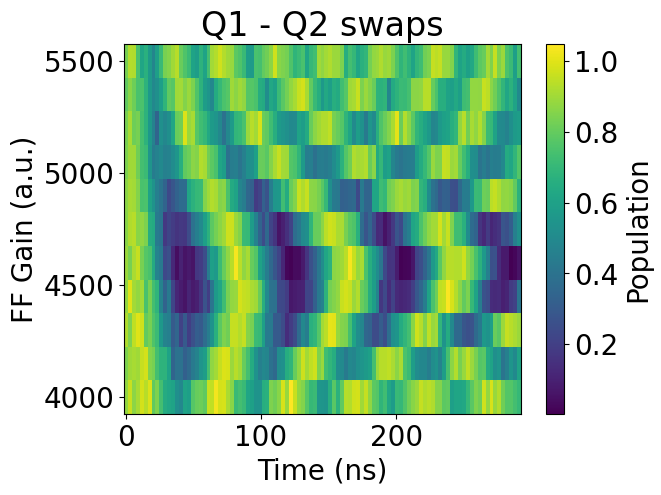

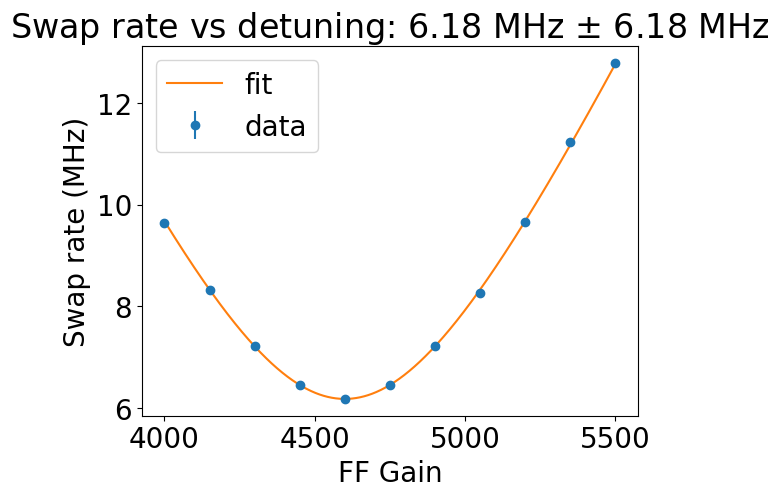

4599.997912196985
Gain_BS: [27500. 28000. 28500. 29000. 29500. 30000. 30500. 31000. 31500. 32000.
 32500.]
I: [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
Q: [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
Qubit_Readout_List: [3.]
angle: [2.93495189]
confusion_matrix: [[[0.96333333 0.15733333]
  [0.03666667 0.84266667]]]
expt_cycles2: [   1.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  58

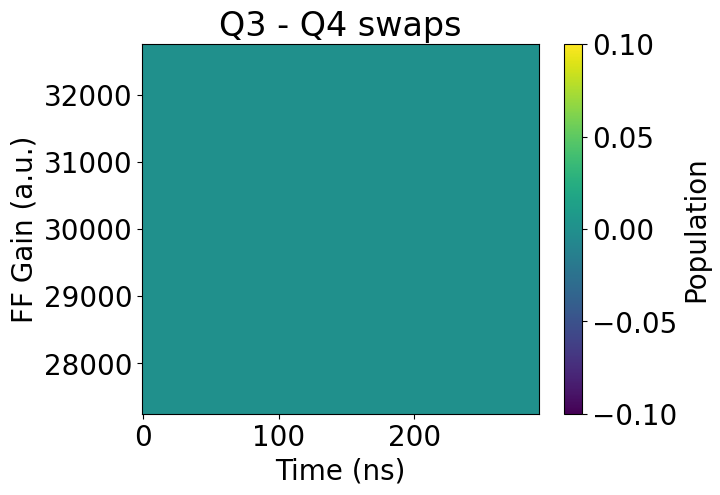

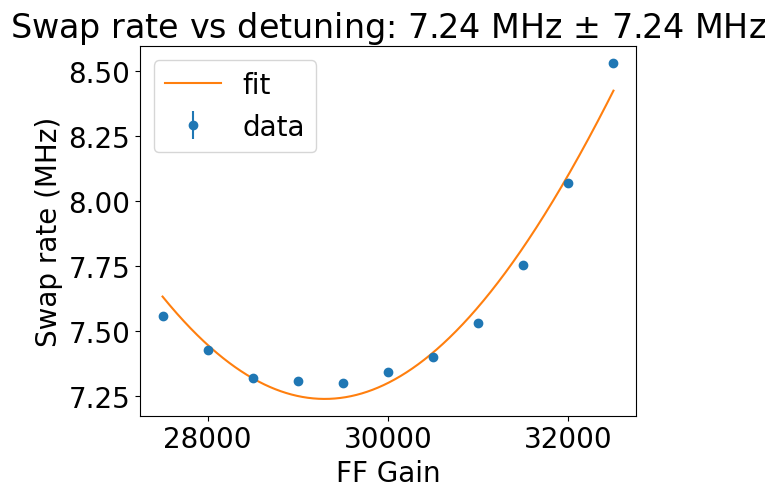

29297.851899039764


In [ ]:
# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '08', '16', '06', '04'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
print(q1_q2_swap.get_ff_gain_center())


q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '08', '15', '29', '25'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
print(q3_q4_swap.get_ff_gain_center())


#### 7/9/25

In [ ]:

### swap chevrons


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '09', '10', '44', '22'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(0, corrected=True)
print(q1_q2_swap.get_ff_gain_center())


q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_swaps_filename('2025', '07', '09', '11', '01', '06'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
print(q3_q4_swap.get_ff_gain_center())

NameError: name 'QubitSwapMeasurement' is not defined

experiment_type: current_swap_gain_sweep


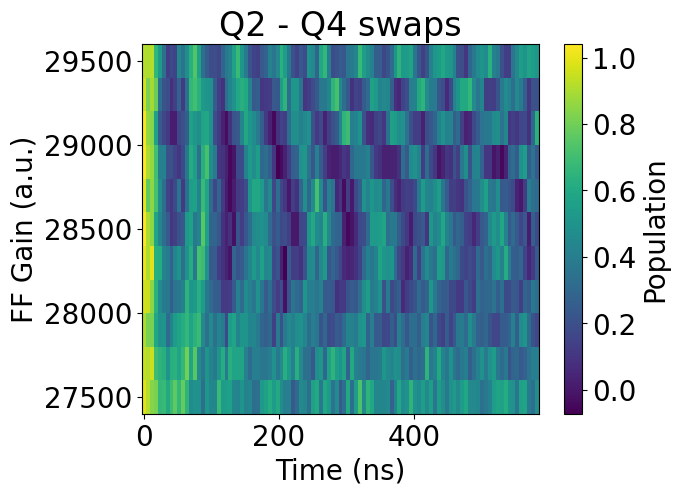

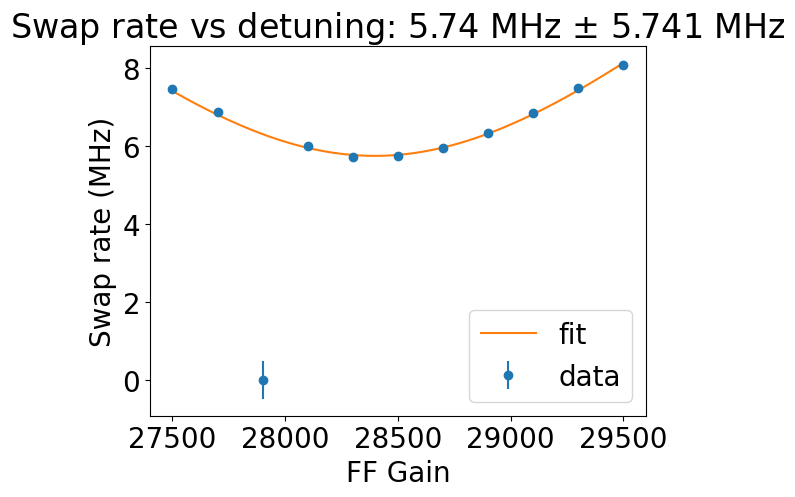

28397.08655517354
experiment_type: current_swap_gain_sweep


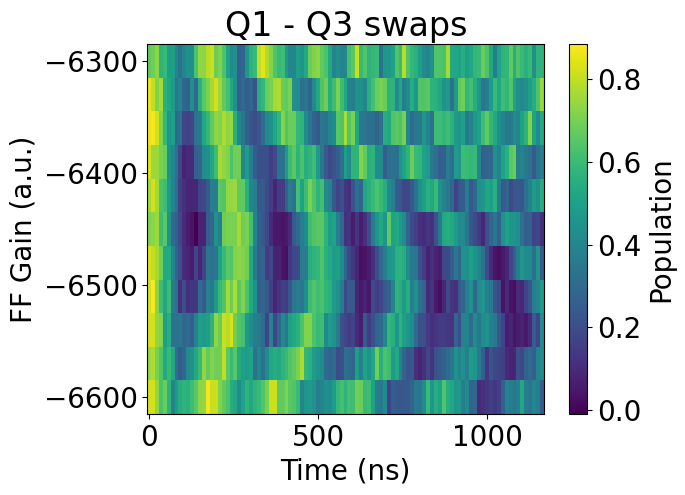

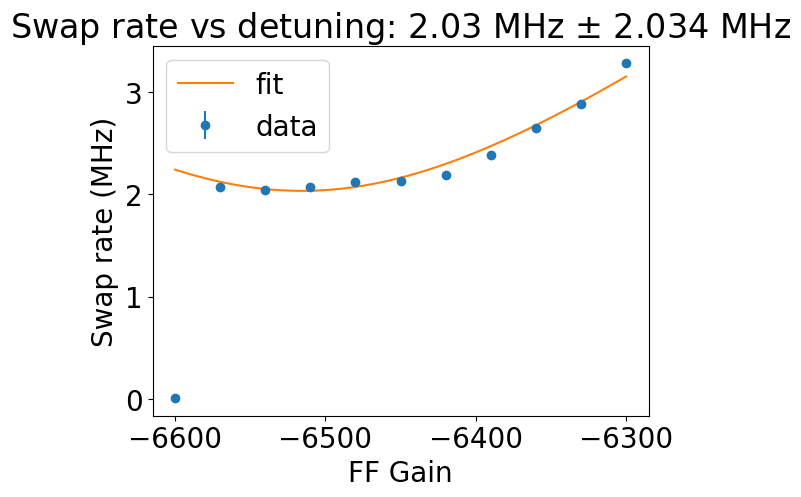

-6515.658026167734


In [ ]:


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q2_q4_swap = QubitSwapMeasurement('Q2', 'Q4', generate_current_swaps_filename('2025', '07', '09', '10', '23', '34'), acquire_kwargs=acquire_kwargs)
q2_q4_swap.plot_chevron_vs_gain()
q2_q4_swap.plot_swap_rate_fit()
print(q2_q4_swap.get_ff_gain_center())


q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_current_swaps_filename('2025', '07', '09', '11', '26', '43'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
print(q1_q3_swap.get_ff_gain_center())

### 7/14/25

experiment_type: swap_gain_sweep
[[[0.9574 0.1208]
  [0.0426 0.8792]]

 [[0.9394 0.1736]
  [0.0606 0.8264]]

 [[0.9098 0.155 ]
  [0.0902 0.845 ]]

 [[0.9178 0.2126]
  [0.0822 0.7874]]]


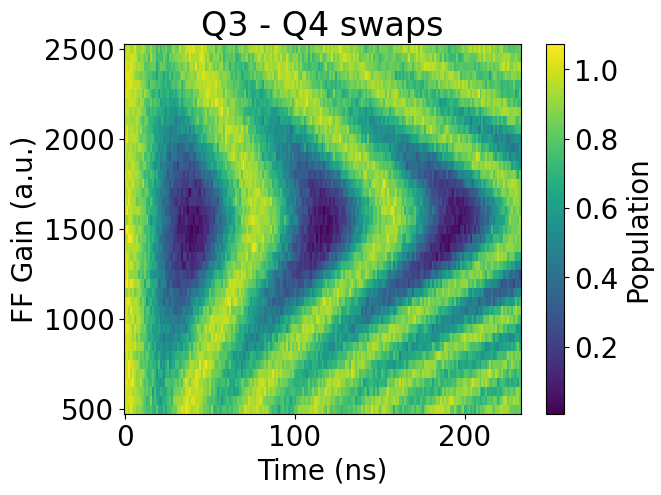

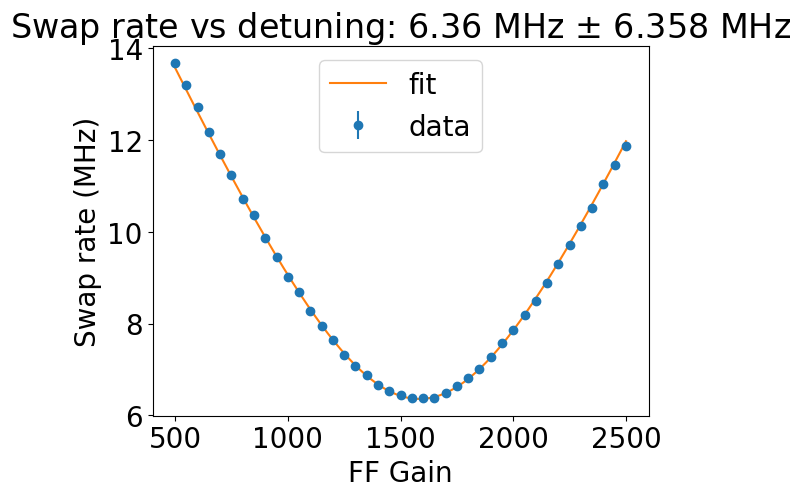

1583.5162018053743


In [51]:

### swap chevrons


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_swaps_filename('2025', '07', '14', '12', '07', '16'), readout_index=2, acquire_kwargs=acquire_kwargs)
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
print(q3_q4_swap.get_ff_gain_center())

### 7/16/25

experiment_type: swap_gain_sweep
[[[0.9572 0.1524]
  [0.0428 0.8476]]]


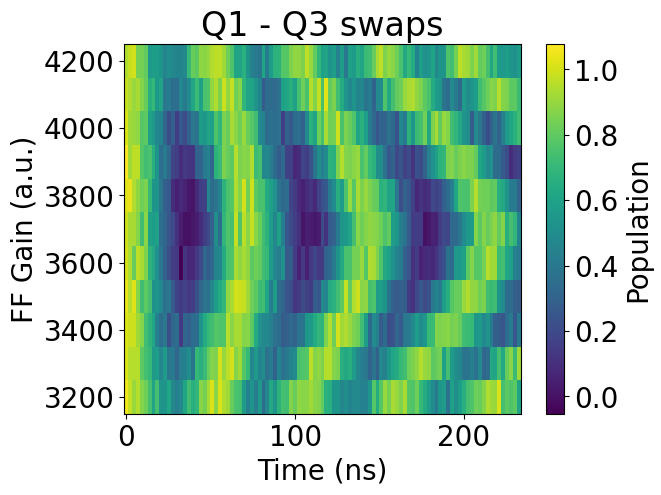

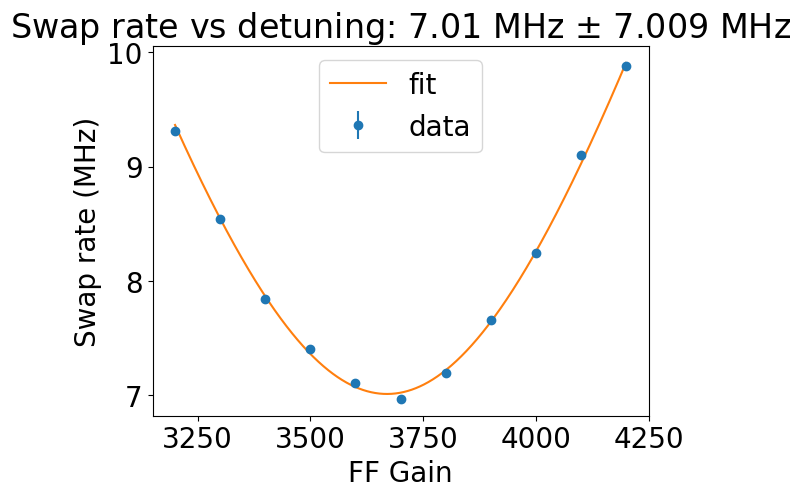

3670.013806769122
experiment_type: swap_gain_sweep
[[[0.9494 0.1586]
  [0.0506 0.8414]]]


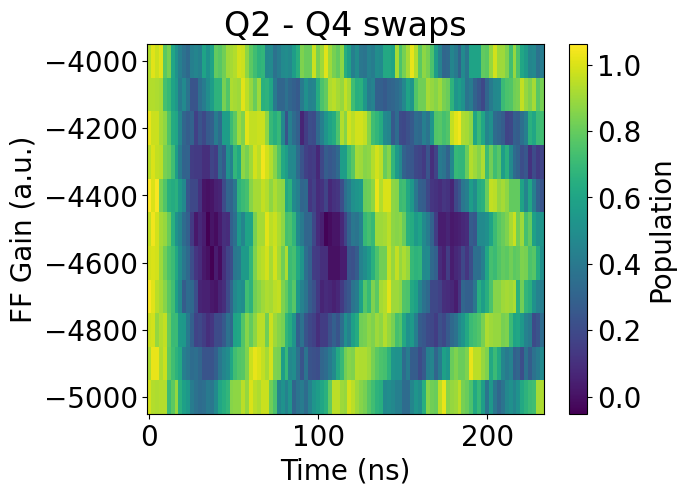

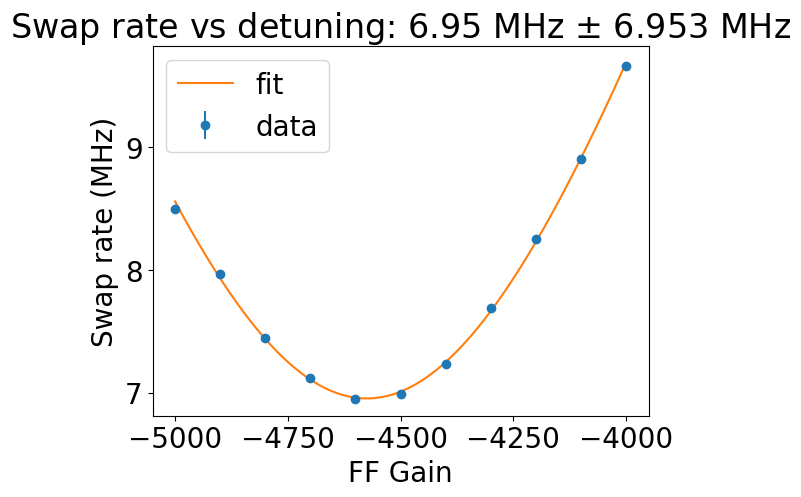

-4574.769157297402


In [60]:
### check tunable coupling for Q1-Q3 and Q2-Q4


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_swaps_filename('2025', '07', '16', '14', '46', '19'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
print(q1_q3_swap.get_ff_gain_center())


q2_q4_swap = QubitSwapMeasurement('Q2', 'Q4', generate_swaps_filename('2025', '07', '16', '14', '53', '56'), acquire_kwargs=acquire_kwargs)
q2_q4_swap.plot_chevron_vs_gain()
q2_q4_swap.plot_swap_rate_fit()
print(q2_q4_swap.get_ff_gain_center())

experiment_type: current_swap_gain_sweep


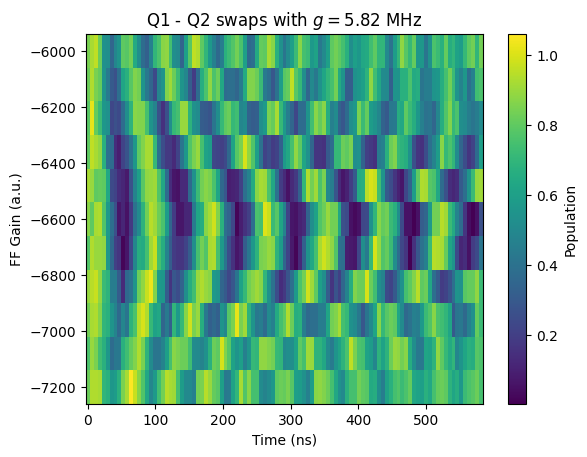

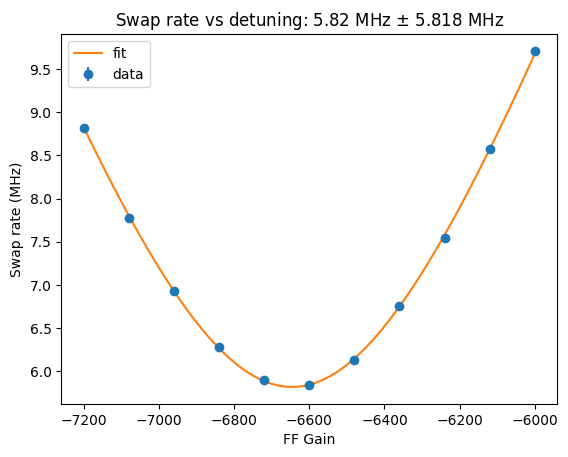

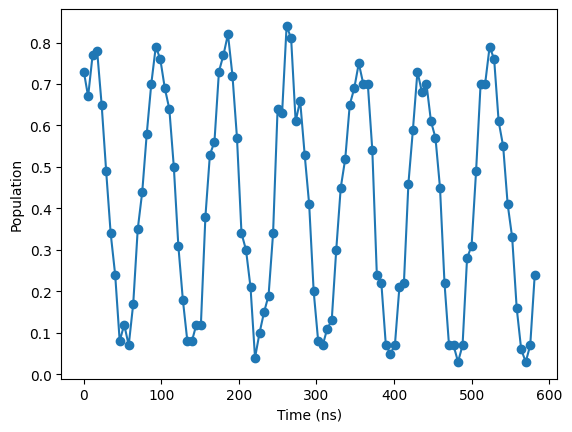

period: 0.54 mus
-6645.8082048719325


In [48]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '16', '17', '30', '40'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)

period = np.pi /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q2_swap.get_ff_gain_center())


### 7/19/25

Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9054 0.1968]
  [0.0946 0.8032]]]


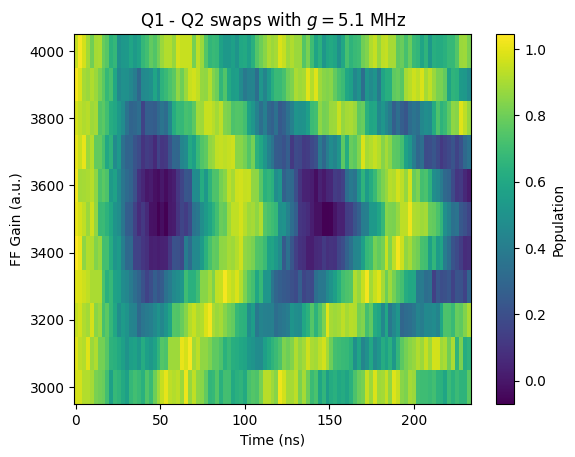

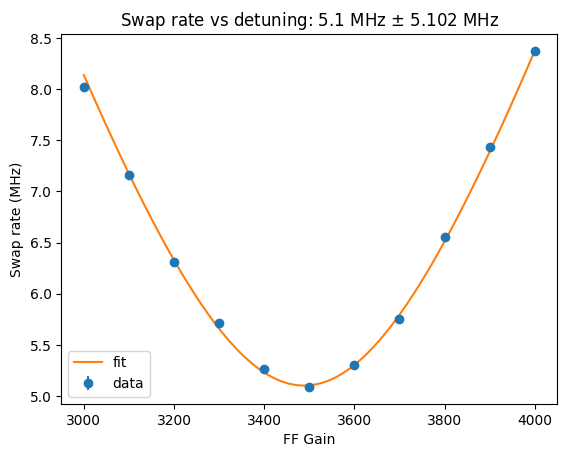

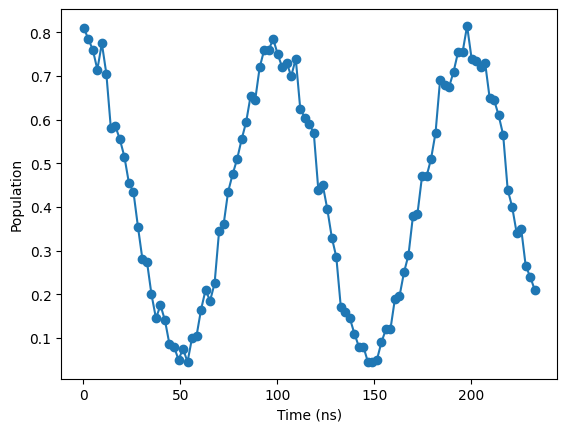

period: 0.62 mus
3488.44374907942
Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9538 0.1726]
  [0.0462 0.8274]]]


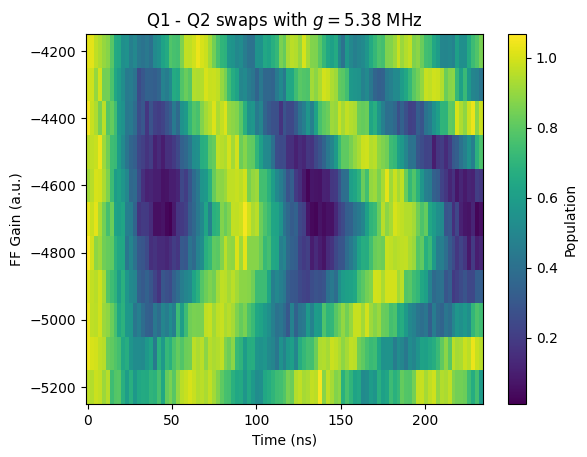

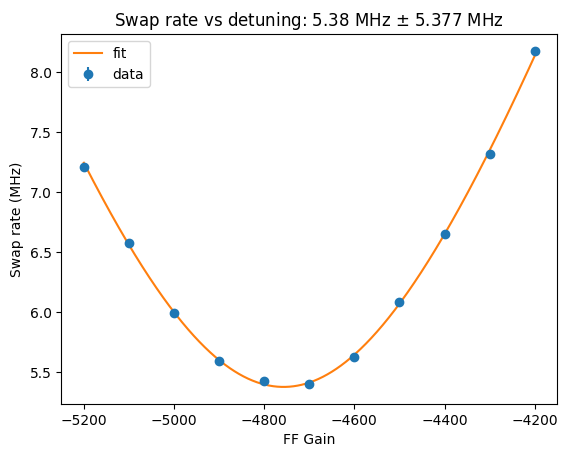

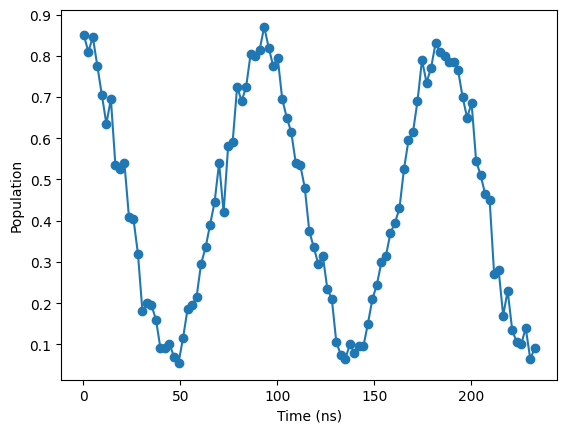

period: 0.58 mus
-4757.027267856002


In [29]:
# tunable coupling gain sweep Q1-Q3


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q1_q3_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '19', '11', '51', '18'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.get_coupling_strength()
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
q1_q3_swap.plot_trace(5, corrected=True)

period = np.pi /q1_q3_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q3_swap.get_ff_gain_center())


# tunable coupling gain sweep Q2-Q4


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q2_q4_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '19', '12', '22', '56'), acquire_kwargs=acquire_kwargs)
q2_q4_swap.get_coupling_strength()
q2_q4_swap.plot_chevron_vs_gain()
q2_q4_swap.plot_swap_rate_fit()
q2_q4_swap.plot_trace(5, corrected=True)

period = np.pi /q2_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q2_q4_swap.get_ff_gain_center())



In [30]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '19', '14', '36', '24'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


times = np.linspace(0, 600, 1001)
plt.plot(times, np.sin(6.74e6/1e9 * times), label='sin(t/100)')

period = np.pi /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q2_swap.get_ff_gain_center())



# current calibration gain sweep Q3-Q4


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '19', '23', '39', '39'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)

period = np.pi /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q3_q4_swap.get_ff_gain_center())


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'V:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\CurrentCalibration_GainSweep\CurrentCalibration_GainSweep_2025_07_19\CurrentCalibration_GainSweep_2025_07_19_14_36_24_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### 07/22/5

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


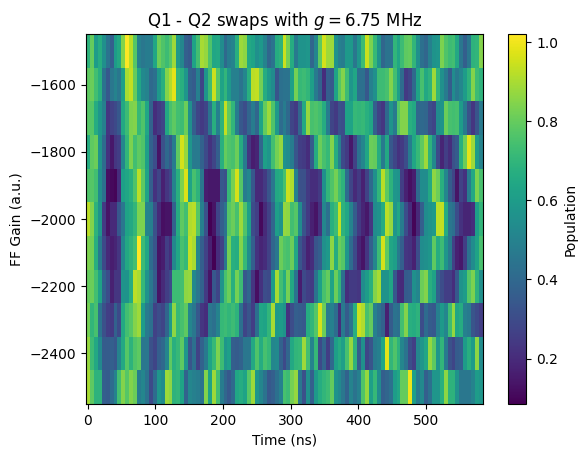

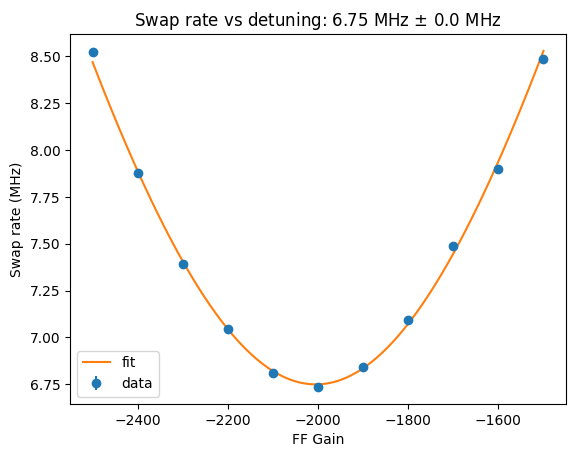

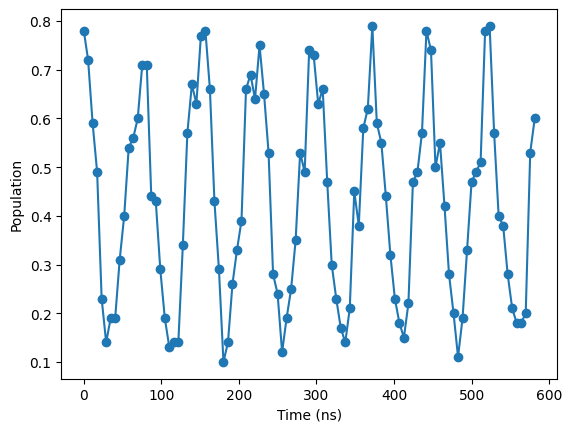

period: 0.47 mus
-2004.7699853563633
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


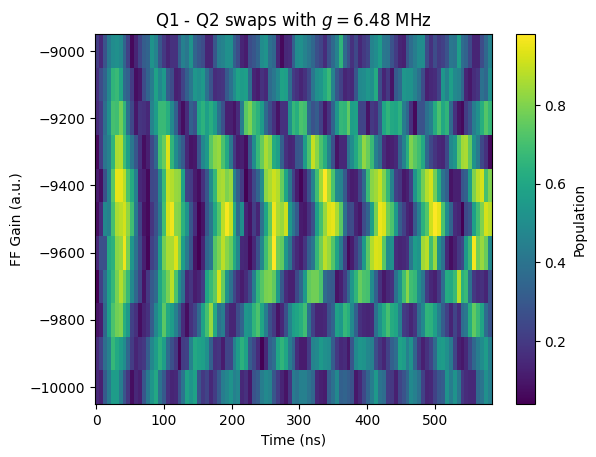

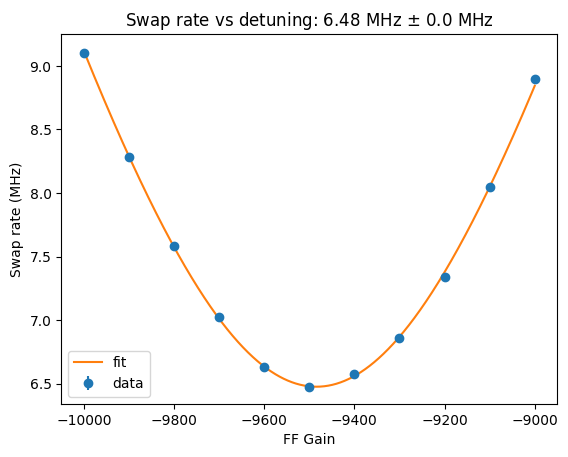

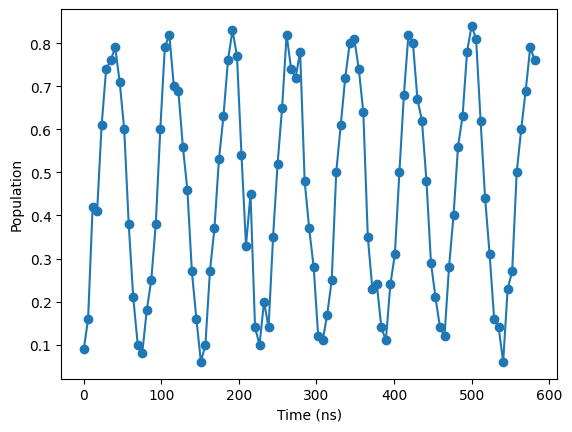

period: 0.49 mus
-9484.07136415269
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


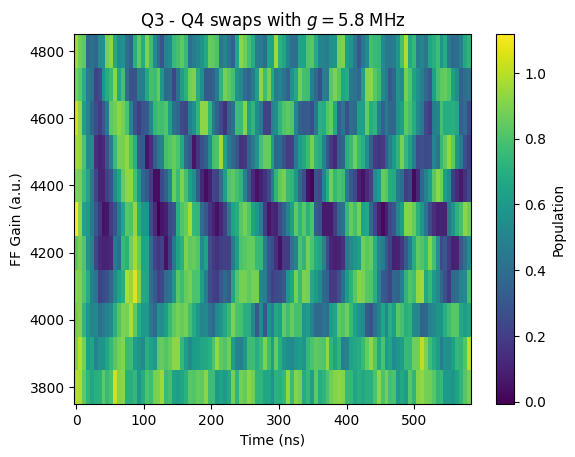

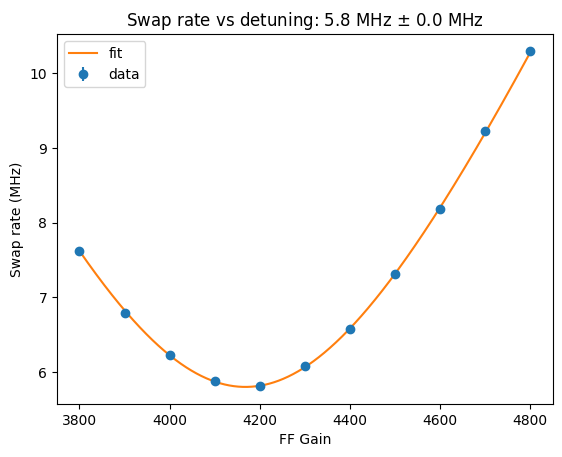

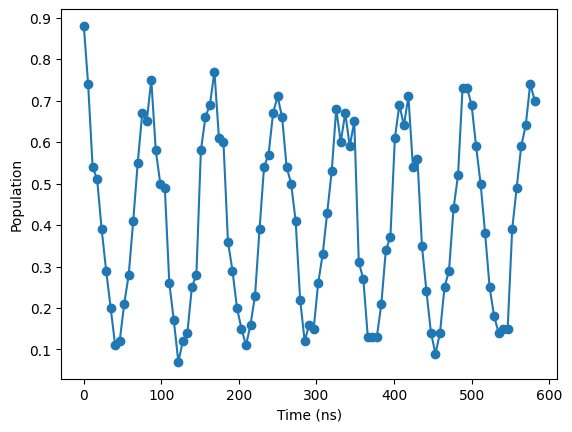

period: 0.54 mus
4168.053195503879


In [48]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '22', '16', '21', '24'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


times = np.linspace(0, 600, 1001)
plt.plot(times, np.sin(6.74e6/1e9 * times), label='sin(t/100)')

period = np.pi /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q2_swap.get_ff_gain_center())

# current calibration gain sweep Q1-Q2 for 2025-07-23 11:33:35

q1_q2_swap_2 = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '23', '11', '33', '35'), acquire_kwargs=acquire_kwargs)
q1_q2_swap_2.get_coupling_strength()
q1_q2_swap_2.plot_chevron_vs_gain()
q1_q2_swap_2.plot_swap_rate_fit()
q1_q2_swap_2.plot_trace(5, corrected=True)

period_2 = np.pi / q1_q2_swap_2.get_coupling_strength()
print(f'period: {np.round(period_2, 2)} mus')

print(q1_q2_swap_2.get_ff_gain_center())




# current calibration gain sweep Q3-Q4


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '22', '16', '52', '04'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)

period = np.pi /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q3_q4_swap.get_ff_gain_center())


### 7/24/25

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


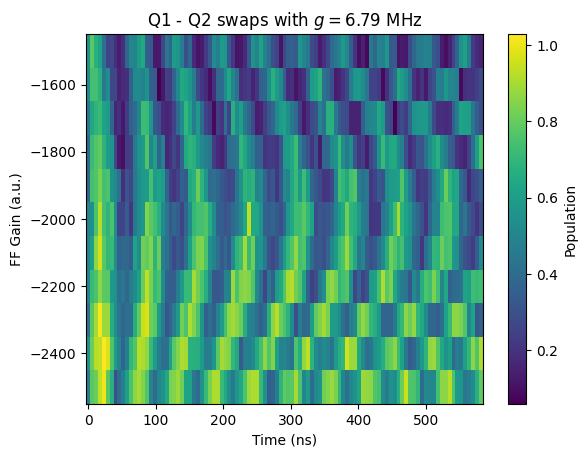

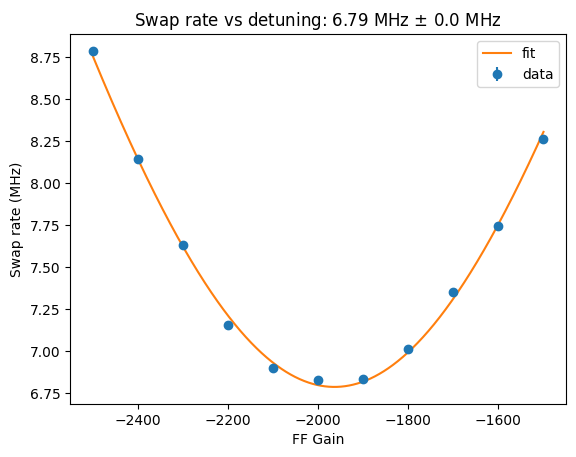

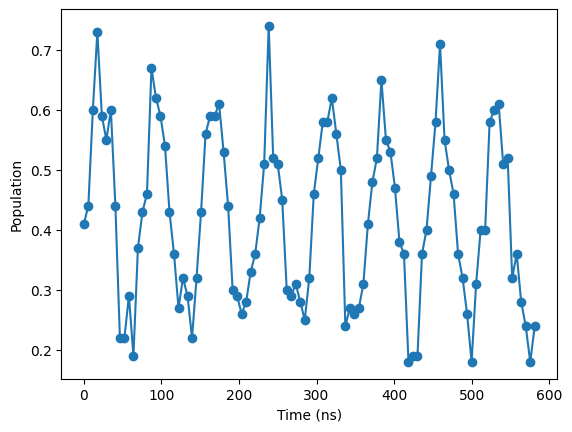

period: 0.46 mus
-1963.584432115643
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


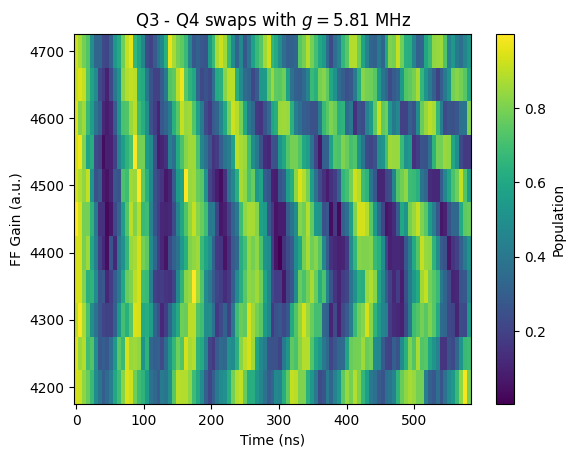

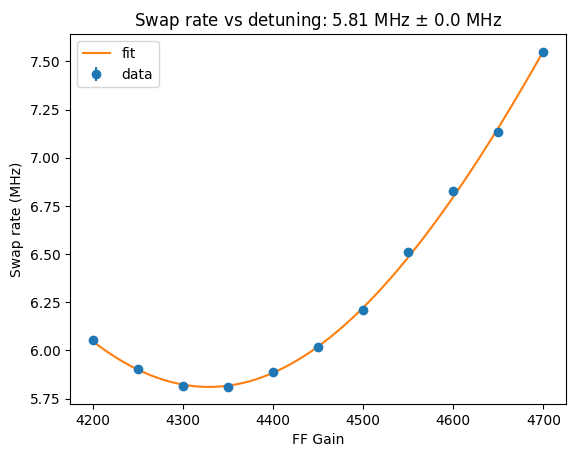

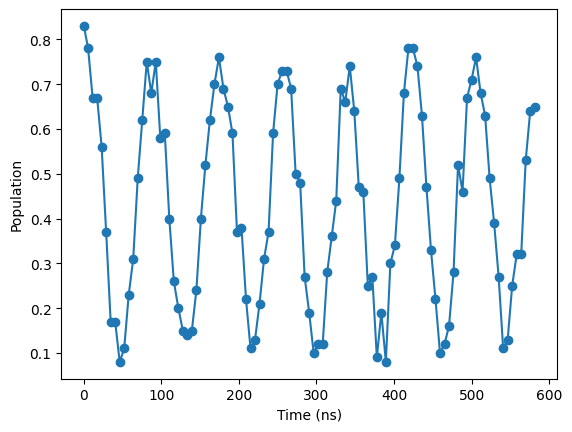

period: 0.54 mus
4329.004725023133


In [25]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '24', '14', '32', '50'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


period = np.pi /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q2_swap.get_ff_gain_center())



q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '24', '16', '17', '35'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period = np.pi /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q3_q4_swap.get_ff_gain_center())

7/25/25

Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.98   0.0638]
  [0.02   0.9362]]

 [[0.9624 0.1024]
  [0.0376 0.8976]]]


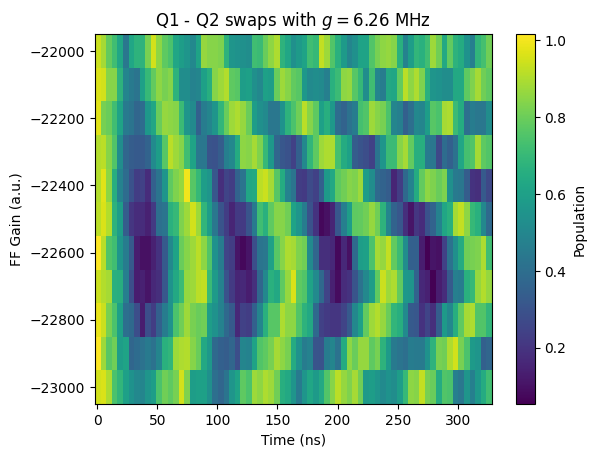

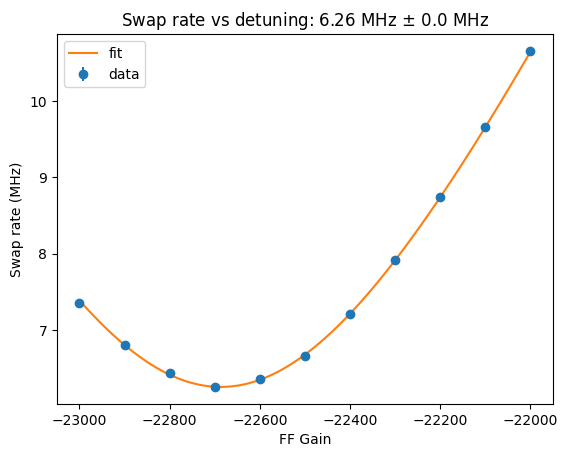

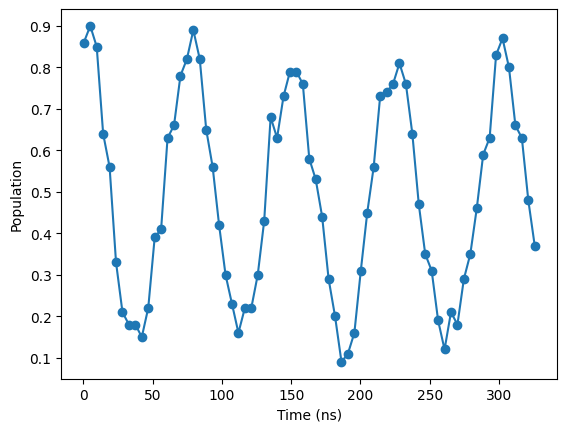

period: 0.5 mus
-22686.421229360476
Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9782 0.0726]
  [0.0218 0.9274]]

 [[0.9396 0.161 ]
  [0.0604 0.839 ]]]


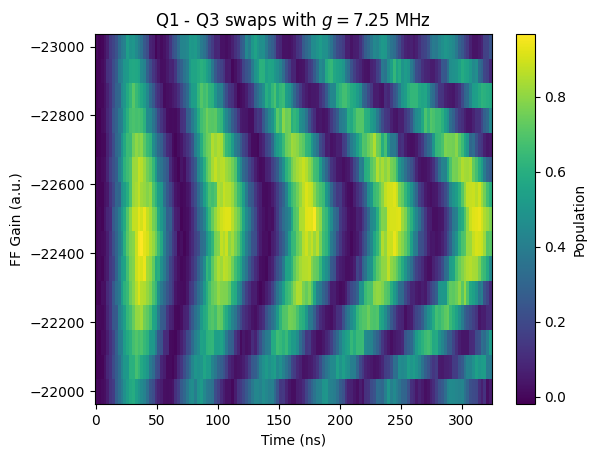

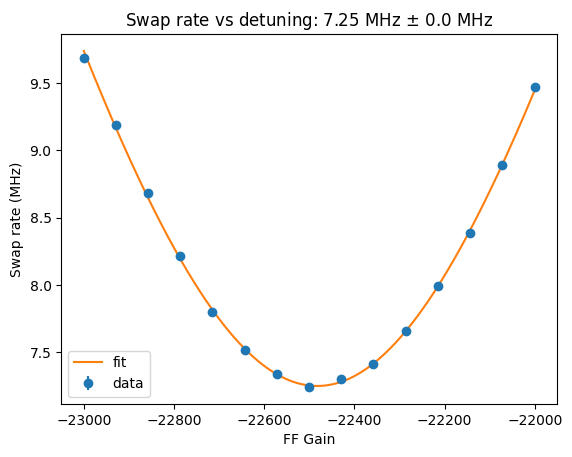

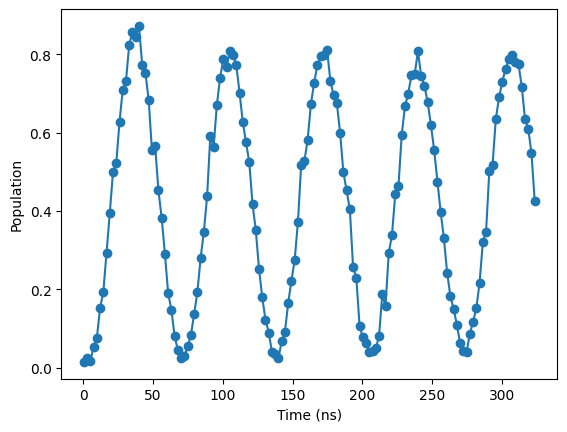

period: 0.43 mus
-22482.27242732833
Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9704 0.0936]
  [0.0296 0.9064]]

 [[0.9546 0.1636]
  [0.0454 0.8364]]]


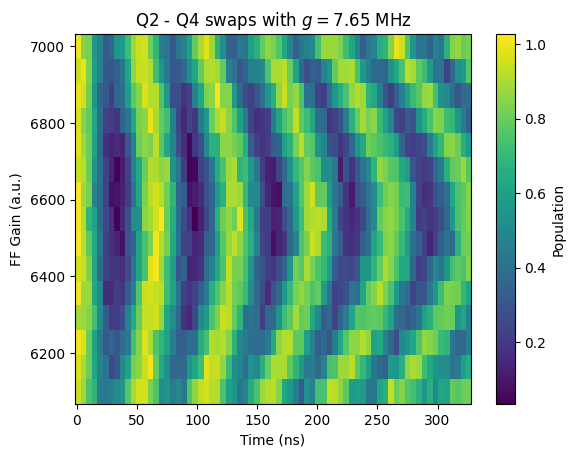

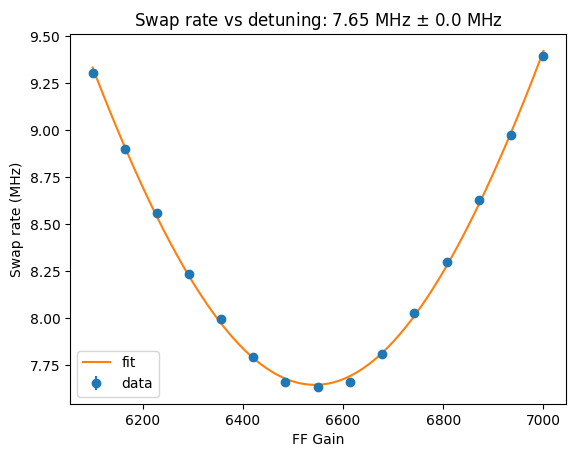

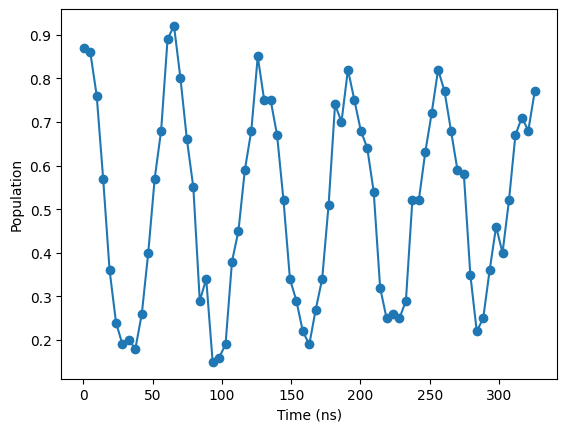

period: 0.41 mus
6543.677822961619


In [30]:
# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

# fixed coupling Q1-Q2
q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_swaps_filename('2025', '07', '25', '17', '11', '10'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)

period = np.pi / q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q2_swap.get_ff_gain_center())

# tunable coupling gain sweep Q1-Q3




q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_swaps_filename('2025', '07', '25', '14', '53', '01'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.get_coupling_strength()
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
q1_q3_swap.plot_trace(5, corrected=True)

period = np.pi /q1_q3_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q1_q3_swap.get_ff_gain_center())


# tunable coupling gain sweep Q2-Q4


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q2_q4_swap = QubitSwapMeasurement('Q2', 'Q4', generate_swaps_filename('2025', '07', '25', '15', '09', '25'), acquire_kwargs=acquire_kwargs)
q2_q4_swap.get_coupling_strength()
q2_q4_swap.plot_chevron_vs_gain()
q2_q4_swap.plot_swap_rate_fit()
q2_q4_swap.plot_trace(5, corrected=True)

period = np.pi /q2_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} mus')

print(q2_q4_swap.get_ff_gain_center())



Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


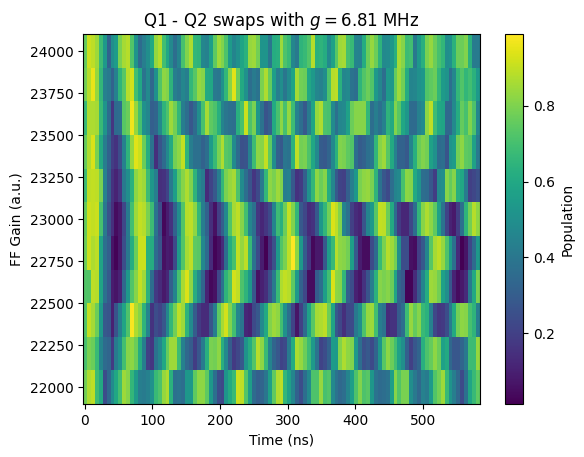

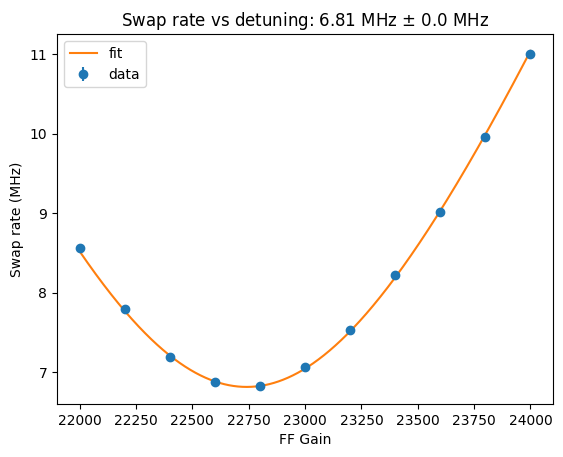

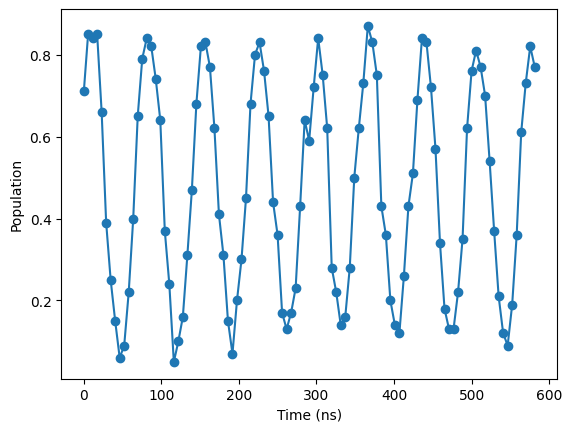

period: 146.8 ns
beamsplitter time: 18.35 ns
22741.23740608288
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


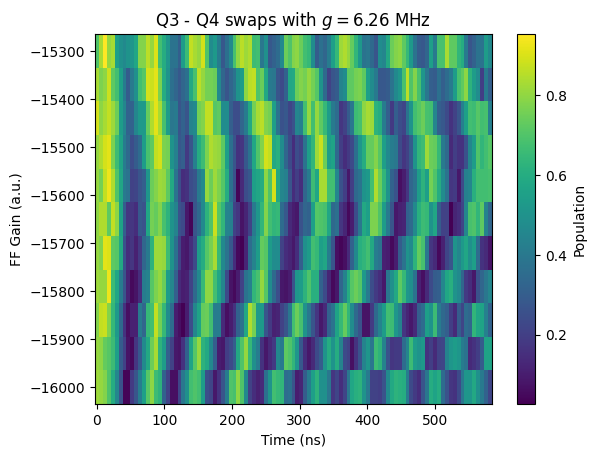

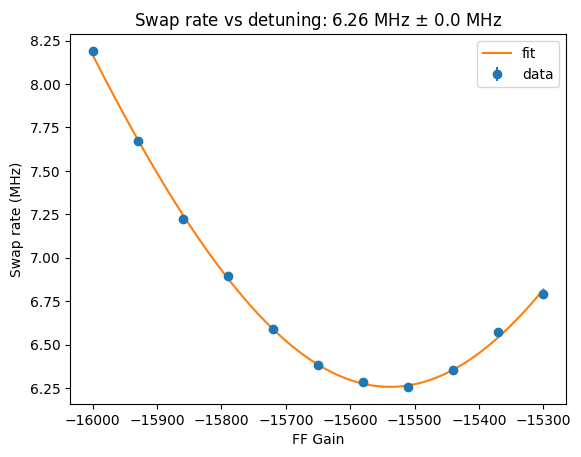

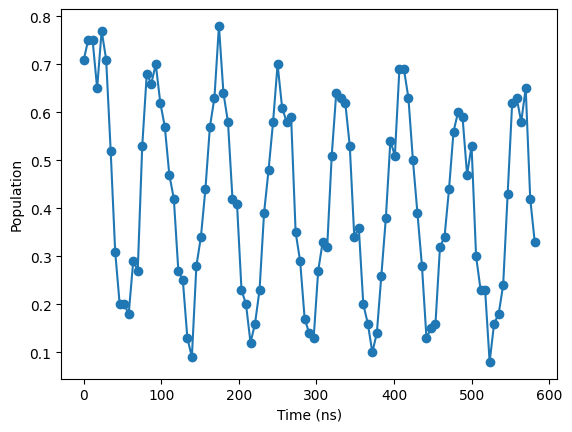

period: 159.83 ns
beamsplitter time: 19.98 ns
-15538.17358054787
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


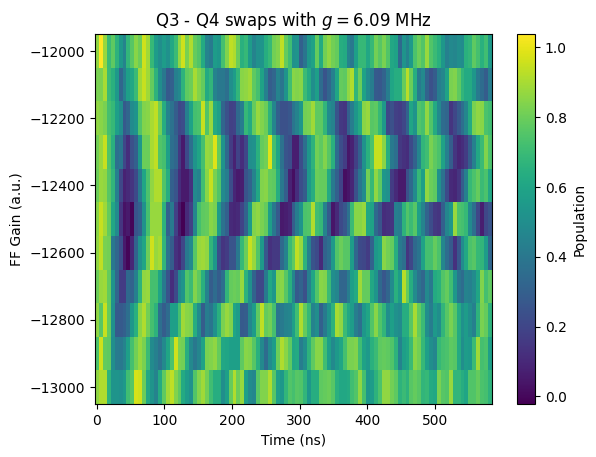

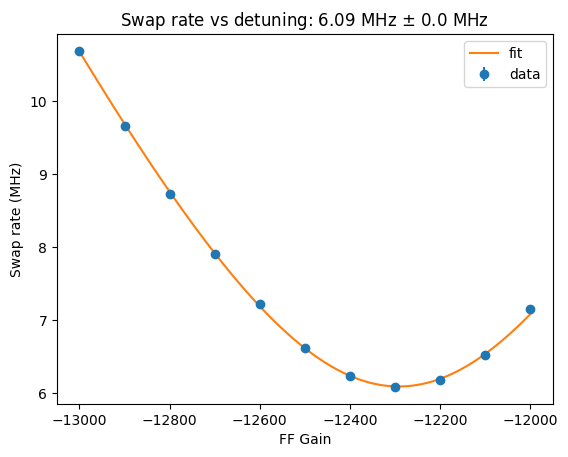

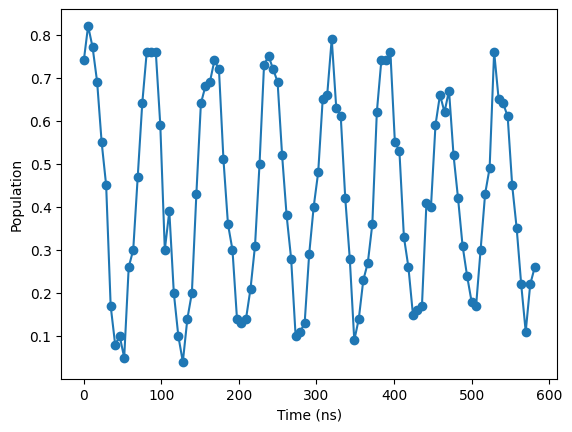

period: 164.19 ns
beamsplitter time: 20.52 ns
-12291.761183109887
Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9442 0.1002]
  [0.0558 0.8998]]

 [[0.9596 0.162 ]
  [0.0404 0.838 ]]]


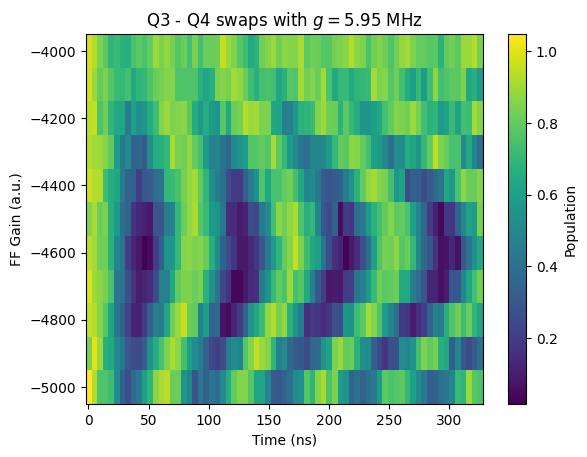

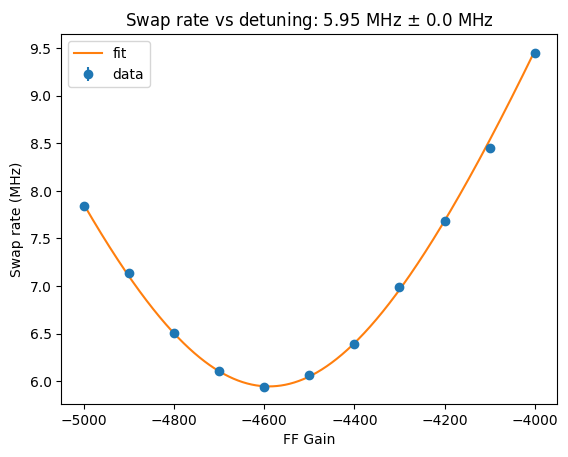

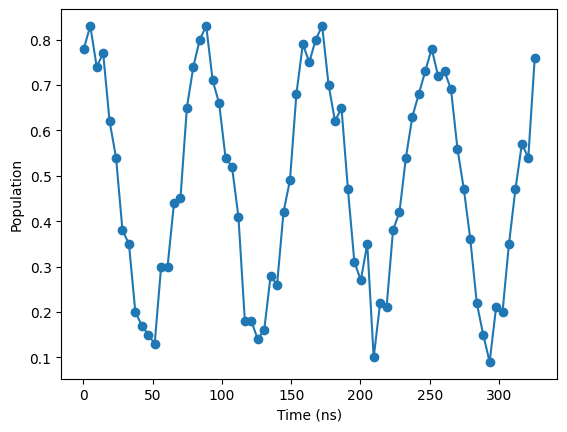

period: 168.21 ns
beamsplitter time: 21.03 ns
-4589.312610342806


In [ ]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'


q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '07', '25', '16', '05', '16'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q1_q2_swap.get_ff_gain_center())




q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '25', '21', '04', '14'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())



q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '07', '25', '22', '12', '27'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())




# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_swaps_filename('2025', '07', '25', '20', '51', '15'), acquire_kwargs=acquire_kwargs)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())

# 7/26/25

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


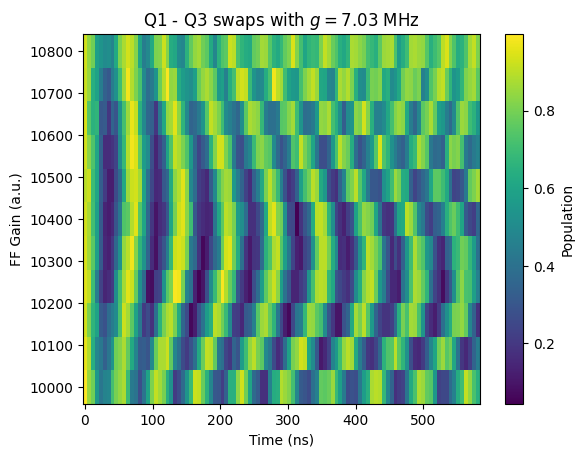

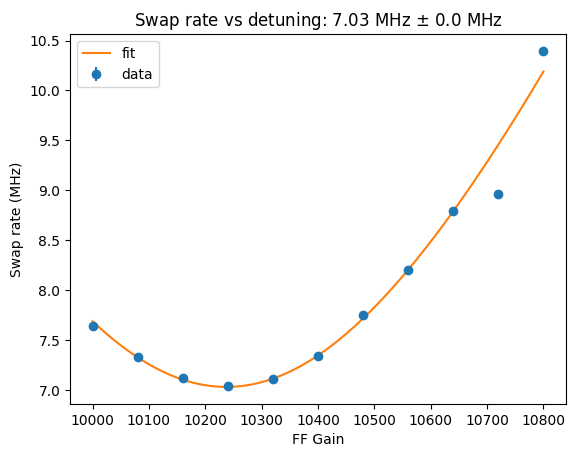

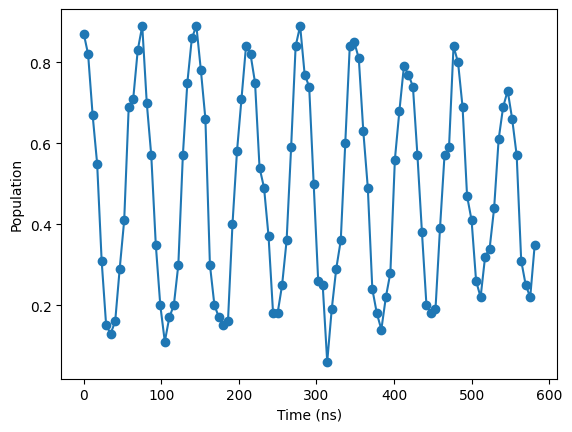

period: 142.21 ns
beamsplitter time: 17.78 ns
10237.352184528196
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


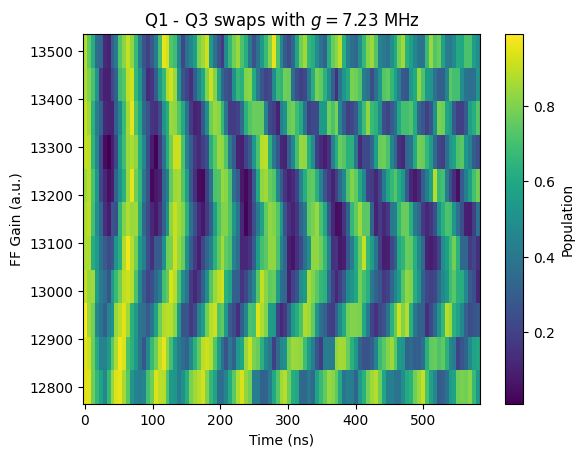

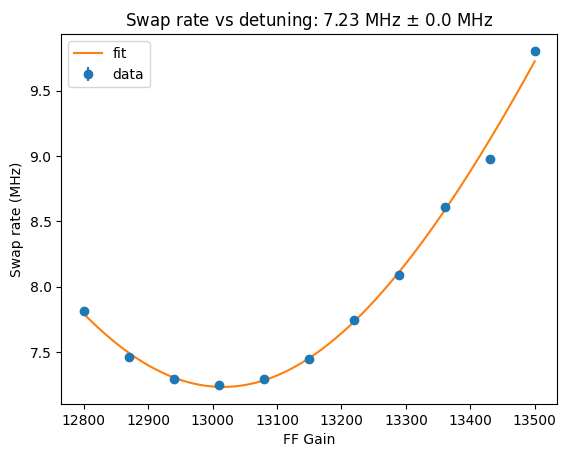

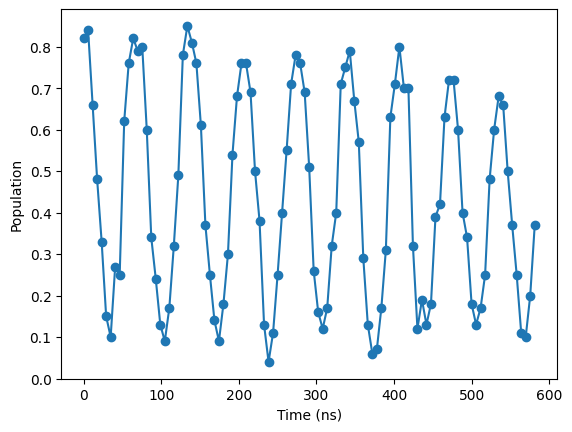

period: 138.25 ns
beamsplitter time: 17.28 ns
13015.84565545677
Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9802 0.0714]
  [0.0198 0.9286]]

 [[0.9406 0.1138]
  [0.0594 0.8862]]]


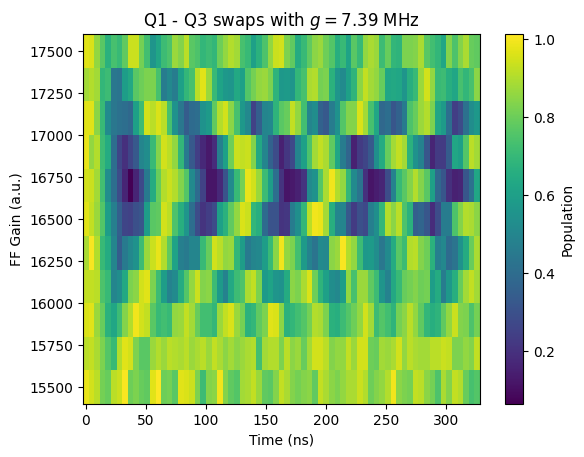

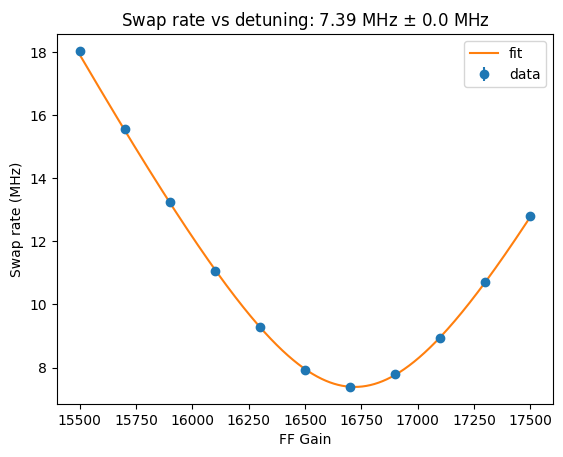

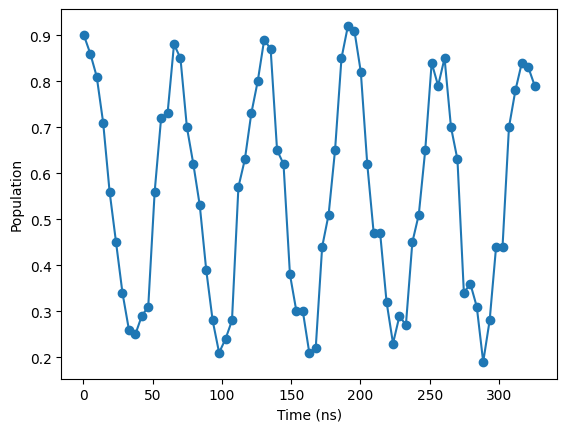

period: 135.39 ns
beamsplitter time: 16.92 ns
beamsplitter time in cycles: 58.36 ns
16720.21976739859


In [22]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'


q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_current_swaps_filename('2025', '07', '26', '14', '10', '52'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.get_coupling_strength()
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
q1_q3_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q3_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q1_q3_swap.get_ff_gain_center())


# other point
q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_current_swaps_filename('2025', '07', '26', '14', '52', '46'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.get_coupling_strength()
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
q1_q3_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q3_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q1_q3_swap.get_ff_gain_center())



# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q1_q3_swap = QubitSwapMeasurement('Q1', 'Q3', generate_swaps_filename('2025', '07', '26', '13', '47', '27'), acquire_kwargs=acquire_kwargs)
q1_q3_swap.get_coupling_strength()
q1_q3_swap.plot_chevron_vs_gain()
q1_q3_swap.plot_swap_rate_fit()
q1_q3_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q3_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')
print(f'beamsplitter time in cycles: {np.round(period/8 * 16 / 4.64, 2)} ns')

print(q1_q3_swap.get_ff_gain_center())

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


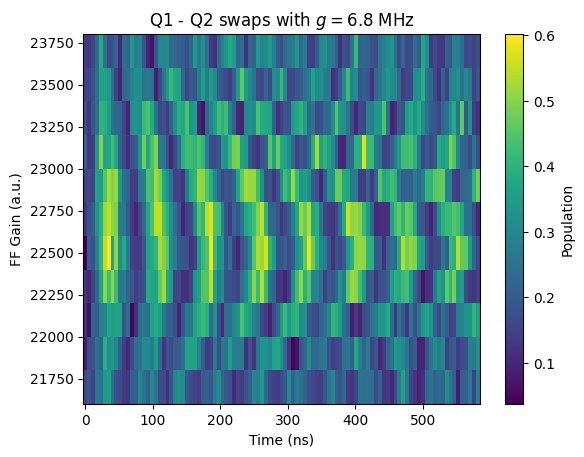

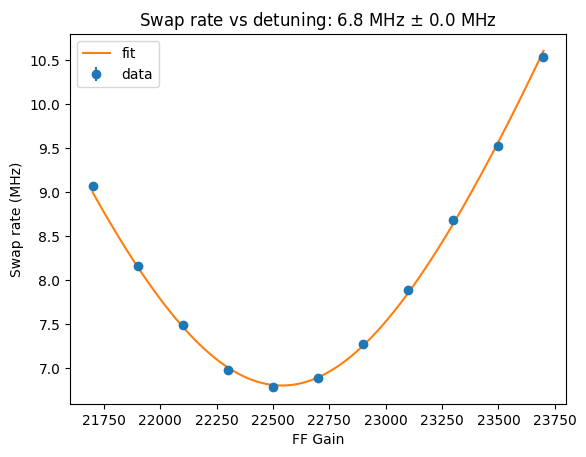

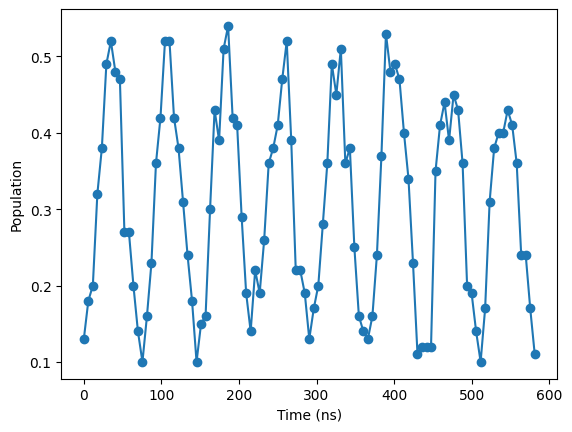

period: 146.96 ns
beamsplitter time: 18.37 ns
22540.042329975364


In [26]:
# current calibration gain sweep Q1-Q2


# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'


q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_ramp_current_swaps_filename('2025', '07', '26', '22', '20', '07'), acquire_kwargs=acquire_kwargs)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q1_q2_swap.get_ff_gain_center())

# 7/27/25

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


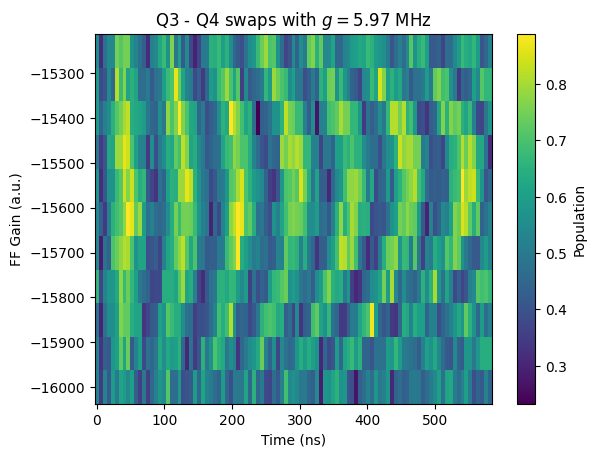

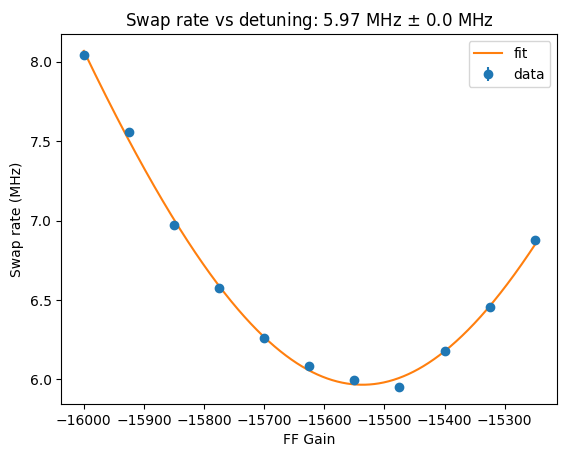

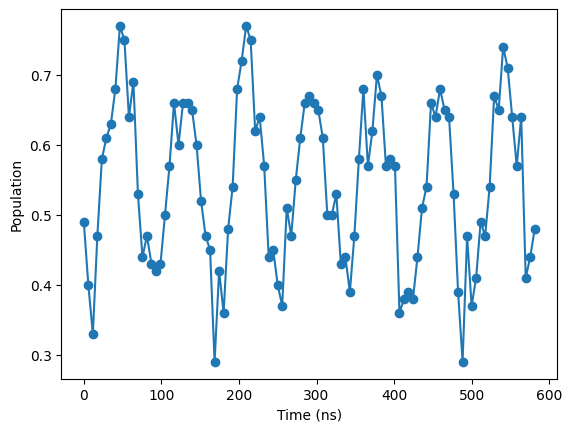

period: 167.62 ns
beamsplitter time: 20.95 ns
-15536.50853213286


In [31]:
# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_ramp_current_swaps_filename('2025', '07', '27', '11', '06', '06'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=2)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())

# 8/2/25

Gain_Expt
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
population
population_corrected
readout_list
threshold
experiment_type: swap_gain_sweep
[[[0.9647 0.101 ]
  [0.0353 0.899 ]]

 [[0.961  0.2248]
  [0.039  0.7752]]]


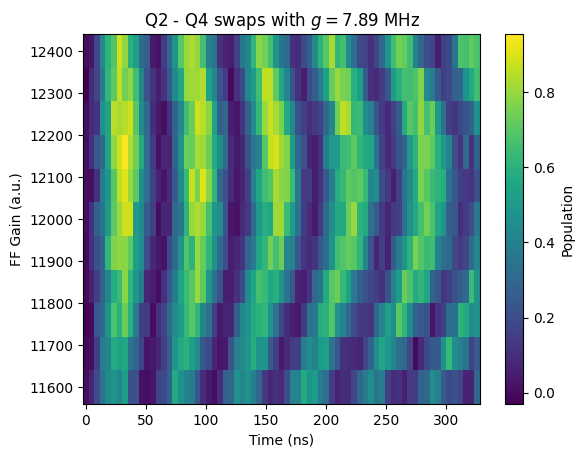

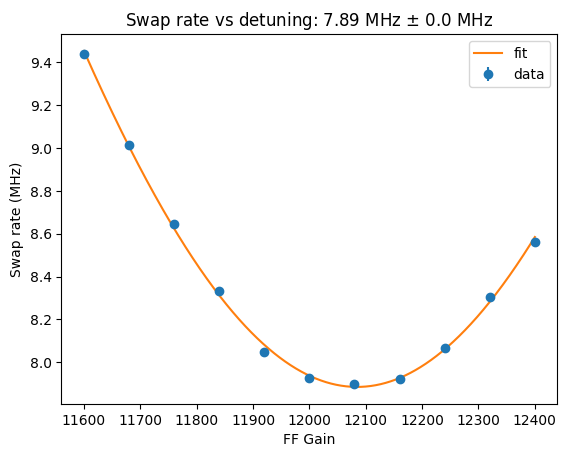

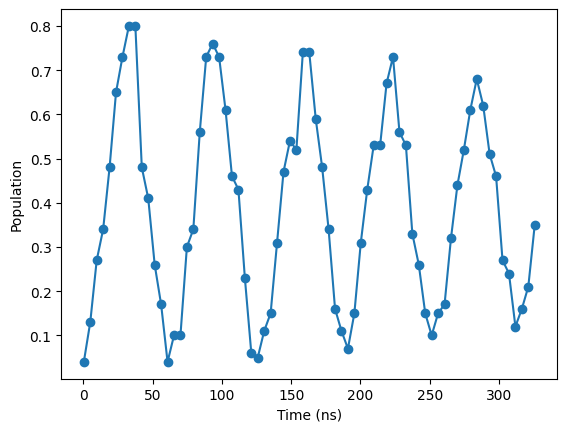

period: 126.82 ns
beamsplitter time: 15.85 ns
12084.550045836424


In [19]:
# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'swap_gain_sweep'

q2_q4_swap = QubitSwapMeasurement('Q2', 'Q4', generate_swaps_filename('2025', '08', '02', '13', '08', '20'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q2_q4_swap.get_coupling_strength()
q2_q4_swap.plot_chevron_vs_gain()
q2_q4_swap.plot_swap_rate_fit()
q2_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q2_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q2_q4_swap.get_ff_gain_center())

# 8/26/25

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples2
population
population_corrected
readout_list
threshold
experiment_type: current_swap_gain_sweep


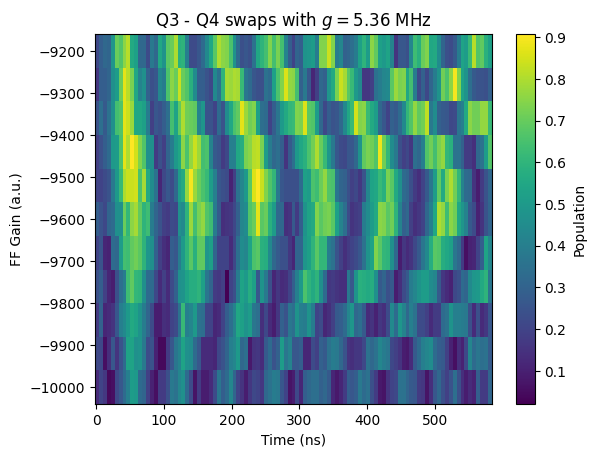

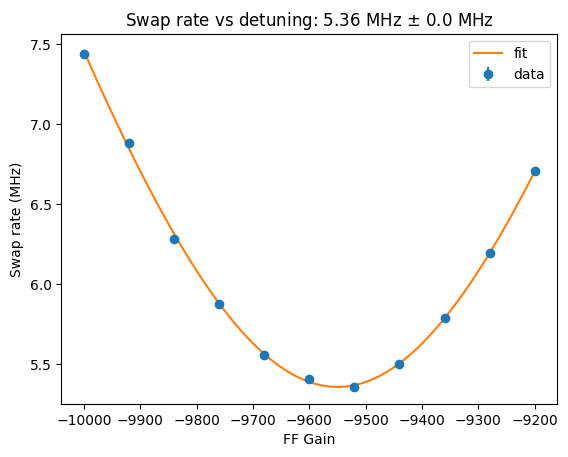

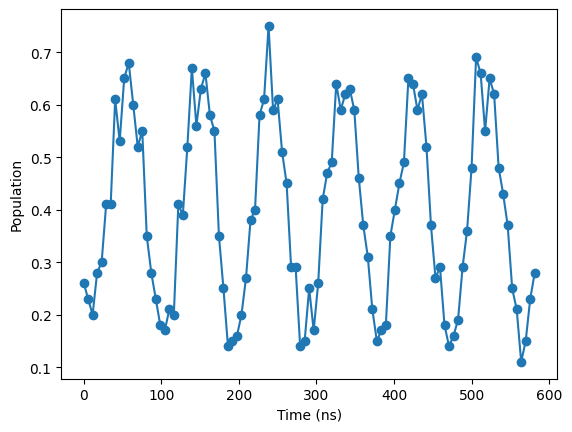

period: 93.32 ns
period samples: 321 sample
beamsplitter time: 11.67 ns
-9549.788209290304


In [22]:
# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'current_swap_gain_sweep'

# q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_current_swaps_filename('2025', '08', '15', '11', '44', '31'), 
#                                   acquire_kwargs=acquire_kwargs, readout_index=0)
# q1_q2_swap.get_coupling_strength()
# q1_q2_swap.plot_chevron_vs_gain()
# q1_q2_swap.plot_swap_rate_fit()
# q1_q2_swap.plot_trace(5, corrected=True)


# period =  1e3 /q1_q2_swap.get_coupling_strength()
# print(f'period: {np.round(period, 2)} ns')
# print(f'beamsplitter time: {np.round(period/8, 2)} ns')

# print(q1_q2_swap.get_ff_gain_center())


q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_current_swaps_filename('2025', '08', '26', '11', '11', '36'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(len(q3_q4_swap.ff_gains)//2, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()/2
print(f'period: {np.round(period, 2)} ns')
print(f'period samples: {int(period / (4.64/16))} sample')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())

Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
fit_freqs
fit_gains
freq_param_list
population
population_corrected
readout_list
threshold
experiment_type: ramp_swap_gain_sweep_r


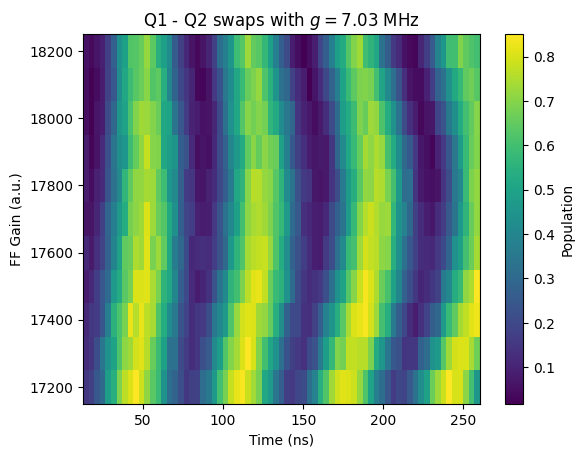

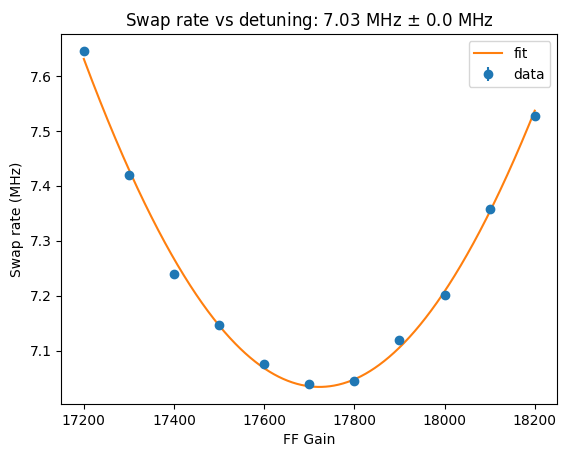

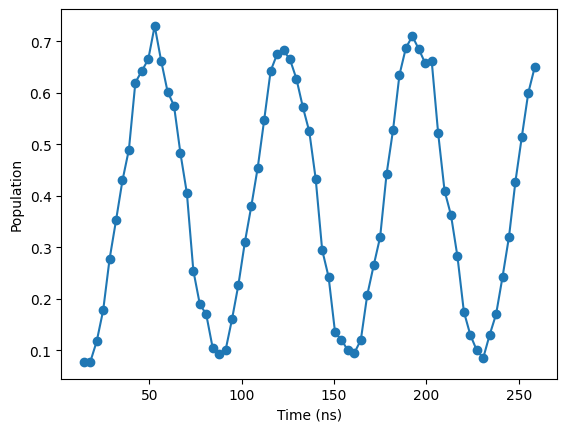

period: 142.17 ns
beamsplitter time: 17.77 ns
17722.255087398087
Gain_BS
I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
fit_freqs
fit_gains
freq_param_list
population
population_corrected
readout_list
threshold
experiment_type: ramp_swap_gain_sweep_r


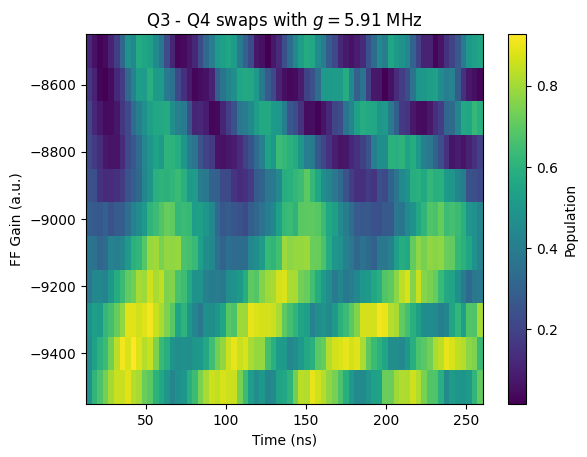

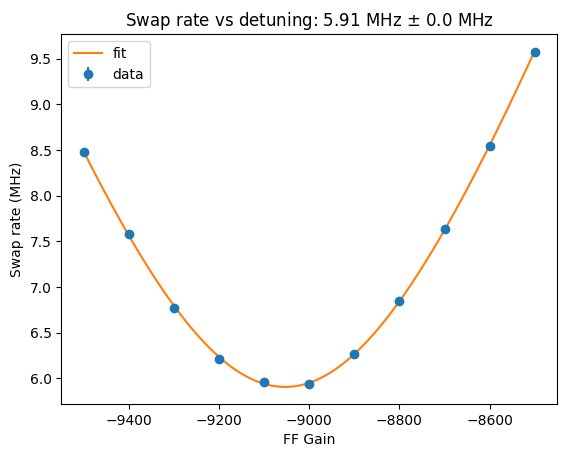

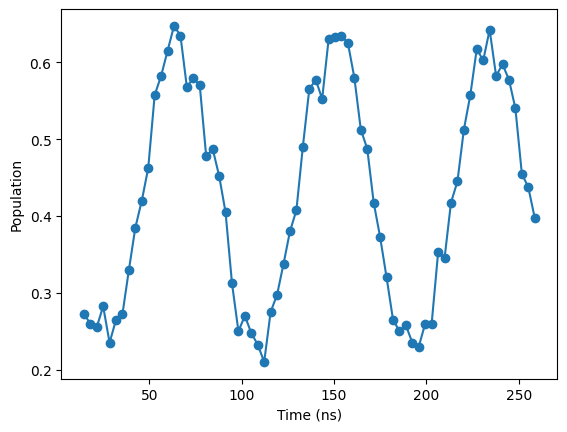

period: 169.31 ns
beamsplitter time: 21.16 ns
-9053.66262292248


In [23]:
### 8/29/25

generate_ramp_beamsplitter_gain_filename

# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'ramp_swap_gain_sweep_r'


q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_ramp_beamsplitter_gain_filename('2025', '08', '29', '13', '03', '47'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()
q1_q2_swap.plot_trace(5, corrected=True)


period =  1e3 /q1_q2_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q1_q2_swap.get_ff_gain_center())



q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_ramp_beamsplitter_gain_filename('2025', '08', '29', '13', '14', '11'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=2)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()
q3_q4_swap.plot_trace(5, corrected=True)


period =  1e3 /q3_q4_swap.get_coupling_strength()
print(f'period: {np.round(period, 2)} ns')
print(f'beamsplitter time: {np.round(period/8, 2)} ns')

print(q3_q4_swap.get_ff_gain_center())



Gain_BS
Qubit_Readout_List
angle
confusion_matrix
expt_samples
fit_freqs
fit_gains
freq_param_list
population
population_corrected
readout_list
threshold
experiment_type: ramp_swap_gain_sweep_r


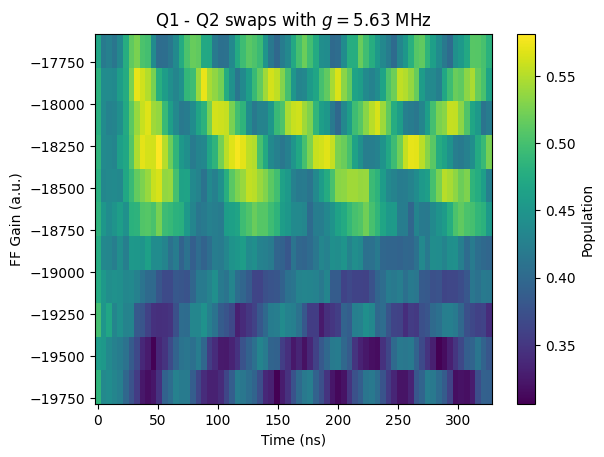

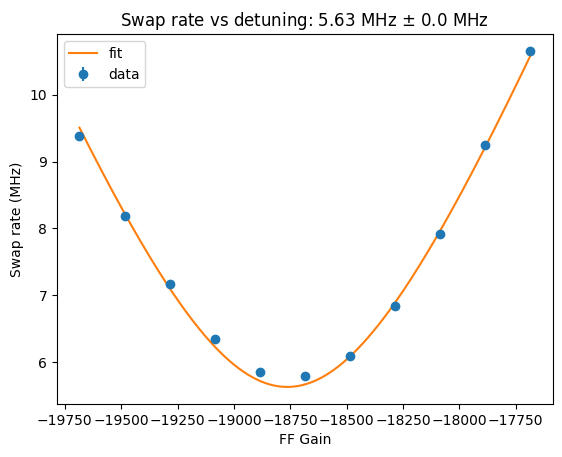

index: 5


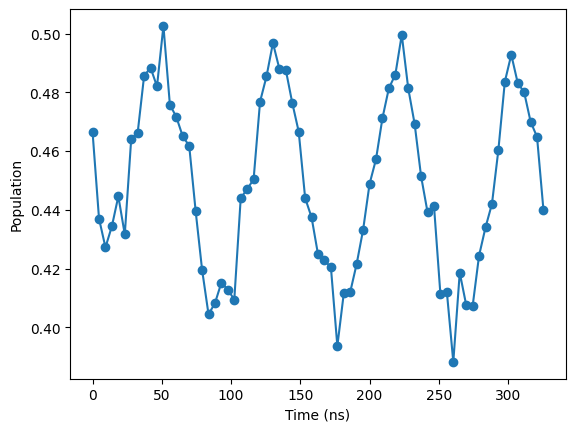

(2, 11, 71)


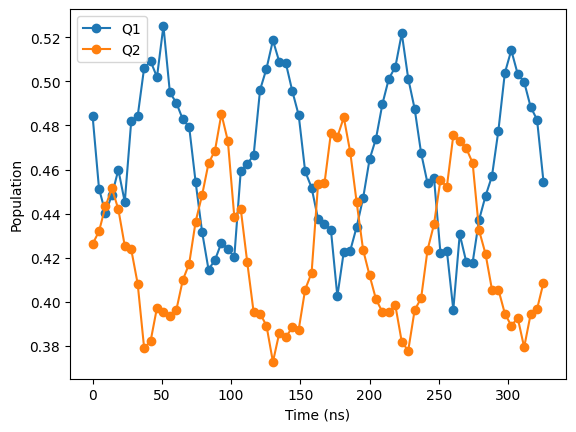

In [20]:
# 9/30/25

# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'ramp_swap_gain_sweep_r'


q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_ramp_beamsplitter_BS_gain_filename('2025', '09', '30', '11', '13', '40'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()

index = int(np.argmin(np.abs(q1_q2_swap.ff_gains - q1_q2_swap.get_ff_gain_center())))
print(f'index: {index}')

q1_q2_swap.plot_trace(5, corrected=True)

populations = q1_q2_swap.get_corrected_populations()
times = q1_q2_swap.get_times()
print(populations.shape)

plt.plot(times, populations[0, index, :], marker='o', label='Q1')
plt.plot(times, populations[1, index, :], marker='o', label='Q2')

plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.show()



Gain_BS
Qubit_Readout_List
angle
confusion_matrix
expt_samples
fit_freqs
fit_gains
freq_param_list
population
population_corrected
readout_list
threshold
experiment_type: ramp_swap_gain_sweep_r


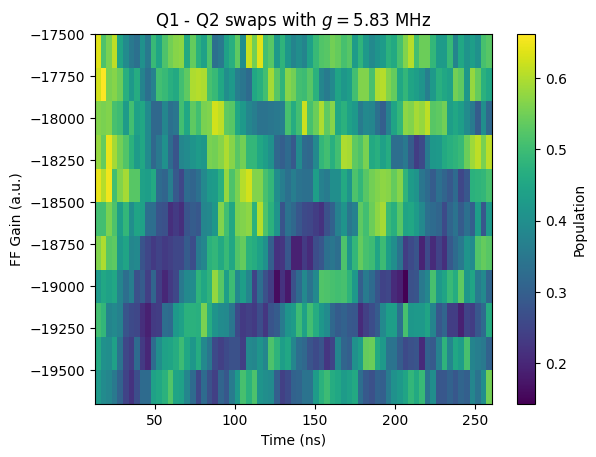

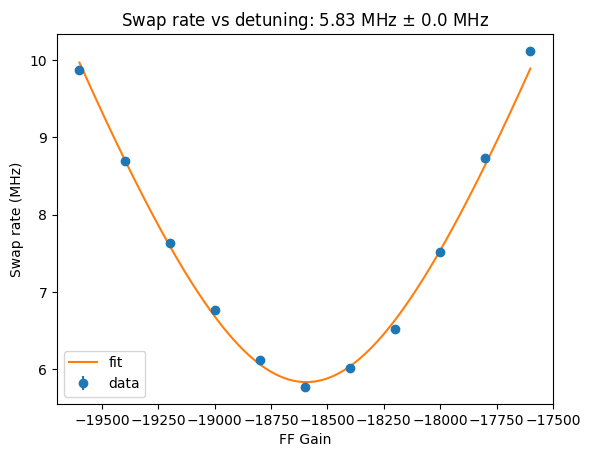

index: 5


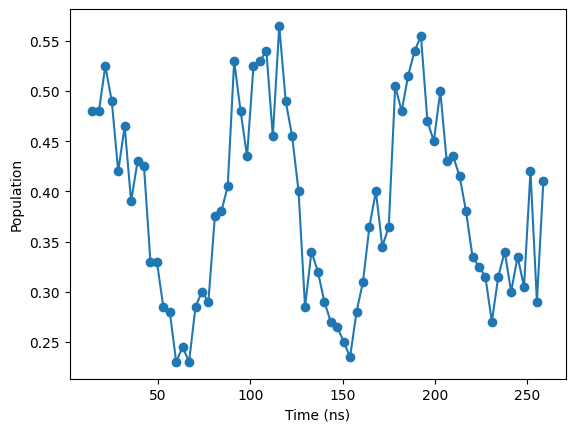

(2, 11, 71)


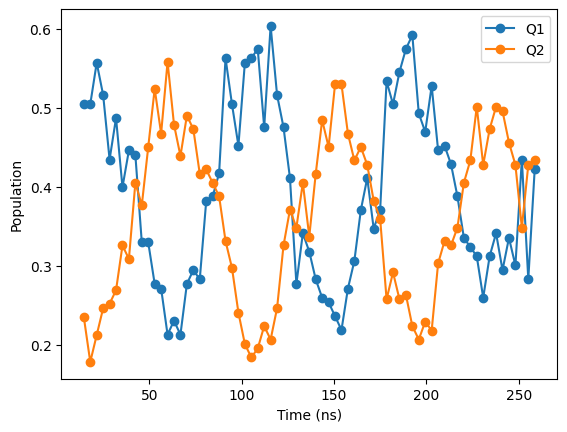

In [18]:
# 10/03/25

# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'ramp_swap_gain_sweep_r'


q1_q2_swap = QubitSwapMeasurement('Q1', 'Q2', generate_ramp_beamsplitter_gain_filename('2025', '10', '03', '14', '08', '36'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q1_q2_swap.get_coupling_strength()
q1_q2_swap.plot_chevron_vs_gain()
q1_q2_swap.plot_swap_rate_fit()

index = int(np.argmin(np.abs(q1_q2_swap.ff_gains - q1_q2_swap.get_ff_gain_center())))
print(f'index: {index}')

q1_q2_swap.plot_trace(5, corrected=True)

populations = q1_q2_swap.get_corrected_populations()
times = q1_q2_swap.get_times()
print(populations.shape)

plt.plot(times, populations[0, index, :], marker='o', label='Q1')
plt.plot(times, populations[1, index, :], marker='o', label='Q2')

plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.show()



Gain_BS
Qubit_Readout_List
angle
confusion_matrix
expt_samples
fit_freqs
fit_gains
freq_param_list
population
population_corrected
readout_list
threshold
experiment_type: ramp_swap_gain_sweep_r


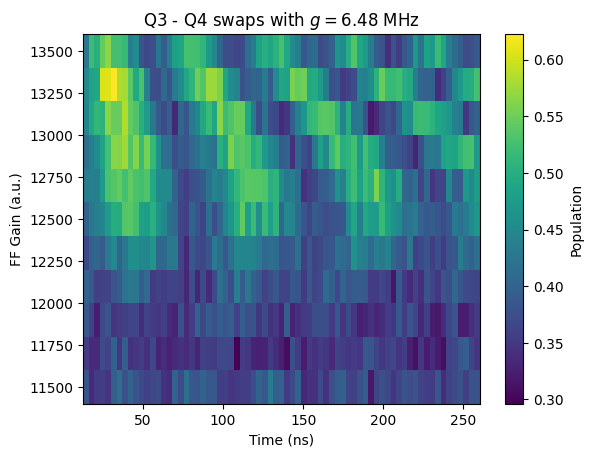

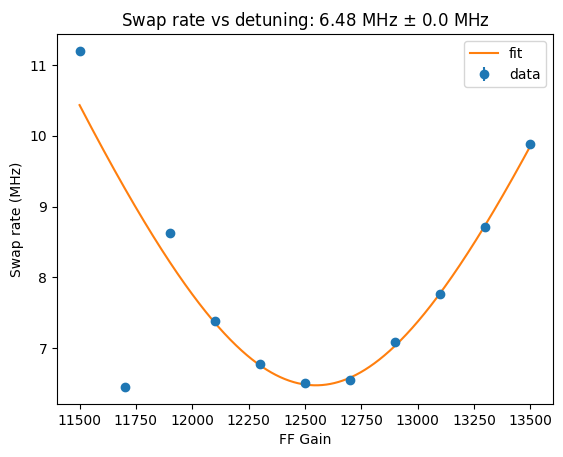

index: 5


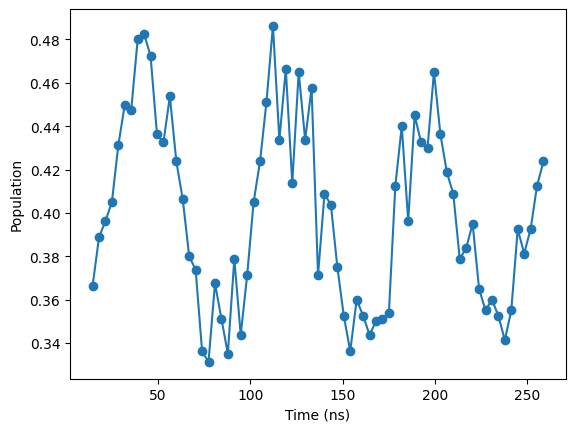

(2, 11, 71)


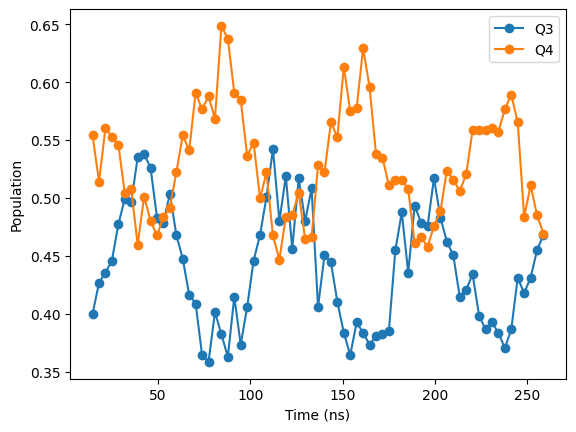

In [25]:
# 10/06/25

# need to specify which expt_cycles to get from these experiments
acquire_kwargs = {}
acquire_kwargs['experiment_type'] = 'ramp_swap_gain_sweep_r'


q3_q4_swap = QubitSwapMeasurement('Q3', 'Q4', generate_ramp_beamsplitter_gain_filename('2025', '10', '06', '16', '34', '30'), 
                                  acquire_kwargs=acquire_kwargs, readout_index=0)
q3_q4_swap.get_coupling_strength()
q3_q4_swap.plot_chevron_vs_gain()
q3_q4_swap.plot_swap_rate_fit()

index = int(np.argmin(np.abs(q3_q4_swap.ff_gains - q3_q4_swap.get_ff_gain_center())))
print(f'index: {index}')

q3_q4_swap.plot_trace(5, corrected=True)

populations = q3_q4_swap.get_corrected_populations()
times = q3_q4_swap.get_times()
print(populations.shape)

plt.plot(times, populations[0, index, :], marker='o', label='Q3')
plt.plot(times, populations[1, index, :], marker='o', label='Q4')

plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.legend()
plt.show()

